In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
import numpy as np
from rich.console import Console
from rich.table import Table
import ipywidgets as widgets
from IPython.display import display, HTML
from scipy import stats
import seaborn as sns

In [3]:
print('='*20,"INTIAL DATA EXPLORATION",'='*20)

==================== INTIAL DATA EXPLORATION ====================


In [4]:
# Read the loan data from CSV file
df = pd.read_csv("data/hmda2017NYC.csv")

/var/folders/x7/rdsx4yt12ns9w6q2h2qykt2m0000gn/T/ipykernel_19924/1211970067.py:2: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/hmda2017NYC.csv")


In [5]:
# ## 1.1 Basic Dataset Information
# Display key information about the dataset to understand its size and structure
print("\n1.1 Basic Dataset Information:")
print(f"Dataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")  # Each row represents a loan application
print(f"Number of Columns: {df.shape[1]}")  # Each column represents a feature or attribute
print(df.dtypes)
df.info()


1.1 Basic Dataset Information:
Dataset Shape: (446902, 78)
Number of Rows: 446902
Number of Columns: 78
as_of_year                          int64
respondent_id                      object
agency_name                        object
agency_abbr                        object
agency_code                         int64
                                   ...   
hud_median_family_income          float64
tract_to_msamd_income             float64
number_of_owner_occupied_units    float64
number_of_1_to_4_family_units     float64
application_date_indicator        float64
Length: 78, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446902 entries, 0 to 446901
Data columns (total 78 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   as_of_year                      446902 non-null  int64  
 1   respondent_id                   446902 non-null  object 
 2   agency_name                     446902 non-

In [6]:
# ## 1.1.1 Feature Categorization
# Identify and separate numerical and categorical features for appropriate analysis methods

# Create lists of numerical and categorical columns for targeted analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(len(numerical_cols))

    
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("numerical_cols : ", numerical_cols)  # Features with continuous or discrete numeric values
print("\ncategorical_cols : ", categorical_cols)  # Features with nominal or ordinal categories
print(len(categorical_cols))

45
numerical_cols :  ['as_of_year', 'agency_code', 'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy', 'loan_amount_000s', 'preapproval', 'action_taken', 'msamd', 'state_code', 'county_code', 'census_tract_number', 'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race_1', 'applicant_race_2', 'applicant_race_3', 'applicant_race_4', 'applicant_race_5', 'co_applicant_race_1', 'co_applicant_race_2', 'co_applicant_race_3', 'co_applicant_race_4', 'co_applicant_race_5', 'applicant_sex', 'co_applicant_sex', 'applicant_income_000s', 'purchaser_type', 'denial_reason_1', 'denial_reason_2', 'denial_reason_3', 'rate_spread', 'hoepa_status', 'lien_status', 'edit_status_name', 'edit_status', 'sequence_number', 'population', 'minority_population', 'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units', 'number_of_1_to_4_family_units', 'application_date_indicator']

categorical_cols :  ['respondent_id', 'agency_name', 'agency_abbr', 'loan_type_name

In [7]:
# ## 1.1.2 Categorical Values Exploration
# Examine unique values in categorical columns to understand potential encoding needs
print("\n1.1.2 Categorical Values:")

for values in categorical_cols:
    print("\nUnique values in", values, ":", df[values].unique())



1.1.2 Categorical Values:

Unique values in respondent_id : ['0003303298' '75-2921540' '11-3019327' '20-0193314' '0000613307'
 '7197000003' '0000480228' '0000112837' '68-0309242' '0000060153'
 '0000852218' '04-3212636' '0000004735' '0000451965' '0000024563'
 '14-1770243' '11-3290207' '0000001644' '7851800005' '0000030976'
 '0000009607' '37-1542226' '0000021122' '0000023521' '0000656733'
 '0000546571' '22-3039688' '0000028765' '0000280110' '0000501105'
 '41-1795868' '11-3217224' '0000019085' '3453209991' '0004114567'
 '0000013292' '0000015969' '0000476810' '0000015802' '7776600008'
 '26-4599244' '0000708059' '0000601416' '0000146672' '0000497404'
 '13-3753941' '0000005588' '7811300008' '0000413208' '20-8921389'
 '0000004580' '0000675332' '11-3073502' '0000339858' '16-1566654'
 '0002735146' '0000001354' '0000057776' '0000008531' '27-2056826'
 '33-0941669' '0000021658' '26-2261031' '20-2355296' '0000705138'
 '75-3170028' '22-3626426' '0000002209' '75-2695327' '11-2961751'
 '20-5868249' '

In [8]:
# # SECTION 1.2: DATA VALIDATION
# This section focuses on assessing data quality and identifying potential issues
print("\n" + "="*50)
print("SECTION 1.2: DATA VALIDATION")
print("="*50)


SECTION 1.2: DATA VALIDATION


In [9]:
# Check missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1)
missing_data.columns = ['Missing Values', 'Percentage']
print("\nMissing values:")
print(missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage', ascending=False))


Missing values:
                                Missing Values  Percentage
application_date_indicator              446902  100.000000
sequence_number                         446902  100.000000
edit_status                             446902  100.000000
edit_status_name                        446902  100.000000
co_applicant_race_5                     446896   99.998657
co_applicant_race_name_5                446896   99.998657
co_applicant_race_name_4                446894   99.998210
co_applicant_race_4                     446894   99.998210
applicant_race_name_5                   446876   99.994182
applicant_race_5                        446876   99.994182
applicant_race_name_4                   446863   99.991273
applicant_race_4                        446863   99.991273
co_applicant_race_name_3                446853   99.989036
co_applicant_race_3                     446853   99.989036
applicant_race_3                        446727   99.960842
applicant_race_name_3                  

In [10]:
# Identify columns with more than 20% missing values
cols_to_drop = missing_percent[missing_percent > 80].index.tolist()
print("\nColumns to drop (more than 20% missing):")
print(cols_to_drop)

# Drop these columns from the DataFrame
df = df.drop(columns=cols_to_drop)
print(f"Dataset shape: {df.shape}")


Columns to drop (more than 20% missing):
['applicant_race_name_2', 'applicant_race_2', 'applicant_race_name_3', 'applicant_race_3', 'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5', 'applicant_race_5', 'co_applicant_race_name_2', 'co_applicant_race_2', 'co_applicant_race_name_3', 'co_applicant_race_3', 'co_applicant_race_name_4', 'co_applicant_race_4', 'co_applicant_race_name_5', 'co_applicant_race_5', 'denial_reason_name_1', 'denial_reason_1', 'denial_reason_name_2', 'denial_reason_2', 'denial_reason_name_3', 'denial_reason_3', 'rate_spread', 'edit_status_name', 'edit_status', 'sequence_number', 'application_date_indicator']
Dataset shape: (446902, 51)


In [11]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates if necessary
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"After removing duplicates: {df.shape}")

Number of duplicate rows: 1080
After removing duplicates: (445822, 51)


In [29]:
# Define the list of columns to drop
columns_to_drop = [
    "as_of_year", # All 2017
    "respondent_id", # Not needed 
    "loan_type", # Numerical code
    "msamd", # Numerical code
    "agency_name", # Not needed 
    "agency_abbr",  # Not needed
    "agency_code", # Numerical code
    "property_type",  # Numerical code
    "loan_purpose",  # Numerical code
    "owner_occupancy",  # Numerical code
    "preapproval_name", #Not needed 
    "preapproval",  # Numerical code
    "action_taken",  # Numerical code
    "state_name",  # All New York
    "state_code",  # Numerical code
    "state_abbr", # Numerical code
    "county_code",  # Numerical code
    "applicant_ethnicity",  # Numerical code
    "co_applicant_ethnicity",  # Numerical code
    "applicant_race_1",  # Numerical code
    "co_applicant_race_1",  # Numerical code
    "applicant_sex",  # Numerical code
    "co_applicant_sex",  # Numerical code
    "purchaser_type_name",  # Not needed
    "purchaser_type",  # Numerical code
    "hoepa_status_name",  # Not needed
    "hoepa_status",  # Numerical code
    "lien_status",  # Numerical code
    'population',  # Not needed 
    'minority_population',  # Not needed 
    'number_of_owner_occupied_units',  # Not needed 
    'number_of_1_to_4_family_units',  # Not needed 
    'msamd_name',  # Not needed 
]

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Display remaining columns to confirm
print("Remaining columns:", df.columns.tolist())


Remaining columns: ['loan_type_name', 'property_type_name', 'loan_purpose_name', 'owner_occupancy_name', 'loan_amount_000s', 'action_taken_name', 'county_name', 'census_tract_number', 'applicant_ethnicity_name', 'co_applicant_ethnicity_name', 'applicant_race_name_1', 'co_applicant_race_name_1', 'applicant_sex_name', 'co_applicant_sex_name', 'applicant_income_000s', 'lien_status_name', 'hud_median_family_income', 'tract_to_msamd_income']


In [30]:
# Print the remaining columns to verify the drop
print("Remaining columns:", df.columns.tolist())


Remaining columns: ['loan_type_name', 'property_type_name', 'loan_purpose_name', 'owner_occupancy_name', 'loan_amount_000s', 'action_taken_name', 'county_name', 'census_tract_number', 'applicant_ethnicity_name', 'co_applicant_ethnicity_name', 'applicant_race_name_1', 'co_applicant_race_name_1', 'applicant_sex_name', 'co_applicant_sex_name', 'applicant_income_000s', 'lien_status_name', 'hud_median_family_income', 'tract_to_msamd_income']


In [31]:
# Define the mapping dictionary
new_names = {
    'loan_type_name': 'loan_type',
    'property_type_name': 'property_type',
    'loan_purpose_name': 'purpose',
    'owner_occupancy_name': 'owner_occupancy',
    'loan_amount_000s': 'loan_amount_k',
    'action_taken_name': 'action_taken',
    'county_name': 'county',
    'census_tract_number': 'census_tract',
    'applicant_ethnicity_name': 'applicant_ethnicity',
    'co_applicant_ethnicity_name': 'co_applicant_ethnicity',
    'applicant_race_name_1': 'applicant_race',
    'co_applicant_race_name_1': 'co_applicant_race',
    'applicant_sex_name': 'applicant_sex',
    'co_applicant_sex_name': 'co_applicant_sex',
    'applicant_income_000s': 'applicant_income_k',
    'lien_status_name': 'lien_status',
    'hud_median_family_income': 'median_family_income',
    'tract_to_msamd_income': 'relative_neighborhood_income'
}

# Rename the columns in your DataFrame
df.rename(columns=new_names, inplace=True)

# Check the new column names
print(df.columns)


Index(['loan_type', 'property_type', 'purpose', 'owner_occupancy',
       'loan_amount_k', 'action_taken', 'county', 'census_tract',
       'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race',
       'co_applicant_race', 'applicant_sex', 'co_applicant_sex',
       'applicant_income_k', 'lien_status', 'median_family_income',
       'relative_neighborhood_income'],
      dtype='object')


In [36]:
cols = ['applicant_sex', 'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race', 'co_applicant_race', 'co_applicant_sex']

df[cols] = df[cols].replace(
    "Information not provided by applicant in mail, Internet, or telephone application",
    "information not provided"
)


In [38]:
# ## 1.2.1 Missing Values Analysis
# Check for missing data that might affect model performance or require imputation
print("\n1.2.1 Missing Values Check:")
missing_values = df.isnull().sum()  # Count missing values in each column
missing_percentage = (missing_values / len(df)) * 100  # Calculate percentage of missing values
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
# Display only columns with missing data
print(missing_df[missing_df['Percentage (%)'] > 0])
print(f"\nTotal missing values: {missing_values.sum()}")  # Total missing values across dataset


1.2.1 Missing Values Check:
                              Missing Values  Percentage (%)
county                                   552        0.123816
census_tract                             931        0.208828
applicant_income_k                     53156       11.923144
median_family_income                     931        0.208828
relative_neighborhood_income             931        0.208828

Total missing values: 56501


In [ ]:
# Create lists of numerical and categorical columns for targeted analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(len(numerical_cols))

    
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("numerical_cols : ", numerical_cols)  # Features with continuous or discrete numeric values
print("\ncategorical_cols : ", categorical_cols)  # Features with nominal or ordinal categories
print(len(categorical_cols))

In [39]:
# ## 1.2.3 Data Type Validation
# Ensure all columns contain appropriate data types without inconsistencies
print("\n1.2.3 Validating Data Types:")
# Check if numerical columns contain non-numeric data that could disrupt analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    non_numeric = pd.to_numeric(df[col], errors='coerce').isna().sum()
    if non_numeric > 0:
        print(f"Column '{col}' contains {non_numeric} non-numeric values")
    else:
        print(f" '{col}': Valid")  # Confirm column contains only valid numeric values


1.2.3 Validating Data Types:
 'loan_amount_k': Valid
Column 'census_tract' contains 931 non-numeric values
Column 'applicant_income_k' contains 53156 non-numeric values
Column 'median_family_income' contains 931 non-numeric values
Column 'relative_neighborhood_income' contains 931 non-numeric values


In [40]:
cols_to_check = [
    'census_tract',
    'applicant_income_k',
    'median_family_income',
    'relative_neighborhood_income'
]

# Loop through each column and print the unique non-numeric values
for col in cols_to_check:
    non_numeric = df.loc[pd.to_numeric(df[col], errors='coerce').isna(), col].unique()
    print(f"Non-numeric values in '{col}': {non_numeric}")

Non-numeric values in 'census_tract': [nan]
Non-numeric values in 'applicant_income_k': [nan]
Non-numeric values in 'median_family_income': [nan]
Non-numeric values in 'relative_neighborhood_income': [nan]


In [41]:
# # SECTION 2: UNIVARIATE ANALYSIS
# Examine distributions of individual variables, beginning with target variable

print("\n" + "="*110)
print("SECTION 2: UNIVARIATE ANALYSIS")
print("="*110)


SECTION 2: UNIVARIATE ANALYSIS


In [42]:
# # SECTION 2.1: Categorical UNIVARIATE ANALYSIS
print("="*110)
print("SECTION 2.1: Categorical UNIVARIATE ANALYSIS")


SECTION 2.1: Categorical UNIVARIATE ANALYSIS


In [43]:

def plot_value_distribution(df, column, threshold_frac=0.01):
    """
    Plot the distribution of values in the specified column using a horizontal bar chart
    and a pie chart. Small categories (below threshold_frac of the total count) are grouped into "Other".
    
    Parameters:
    - df: pandas DataFrame containing the data.
    - column: the column name (string) for which the distribution is to be plotted.
    - threshold_frac: the threshold fraction (default 1%) to group small categories.
    """
    # Count the unique values in the column
    value_counts = df[column].value_counts()
    
    # Set a threshold count for what's considered a "small" category
    threshold = len(df) * threshold_frac
    
    # Create a copy for the pie chart data
    pie_data = value_counts.copy()
    
    # Group small categories into "Other"
    mask_small = pie_data < threshold
    if mask_small.any():
        other_sum = pie_data[mask_small].sum()
        pie_data = pie_data[~mask_small]
        if other_sum > 0:
            pie_data['Other'] = other_sum
    
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Wrap long labels for the horizontal bar chart (adjust width as needed)
    wrapped_labels = [textwrap.fill(label, width=25) for label in value_counts.index]
    
    # Horizontal Bar Chart for better readability
    ax1.barh(wrapped_labels, value_counts.values, color=plt.cm.tab10.colors)
    ax1.set_title(f'{column} Counts', fontsize=14)
    ax1.set_xlabel('Count', fontsize=12)
    ax1.set_ylabel(column, fontsize=12)
    ax1.tick_params(axis='y', labelsize=10)
    
    # Pie Chart: adjust autopct label placement to avoid overlapping
    colors = plt.cm.tab10.colors[:len(pie_data)]
    wedges, texts, autotexts = ax2.pie(
        pie_data.values,
        labels=None,  # Labels are provided via the legend instead of directly on the pie
        autopct=lambda pct: f'{pct:.1f}%' if pct > 3 else '',  # Only show percentages for slices > 3%
        startangle=90,
        colors=colors,
        pctdistance=0.8,
        wedgeprops={'edgecolor': 'w', 'linewidth': 1},
        textprops={'fontsize':10}
    )
    ax2.set_title(f'{column} Distribution', fontsize=14)
    ax2.axis('equal')  # Draw the pie as a circle
    
    # Format percentage text (optional adjustments)
    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_fontweight('bold')
        autotext.set_color('black')
    
    # Add a clear legend to the pie chart
    ax2.legend(
        wedges, 
        pie_data.index,
        title=column,
        loc="center left", 
        bbox_to_anchor=(1.0, 0.5),
        fontsize=10,
        title_fontsize=12
    )
    
    plt.tight_layout()
    plt.show()

In [44]:

def print_value_distribution_stats_rich(df, column, threshold_frac=0.01):
    """
    Print nicely formatted, modern tables of statistics for the specified column using rich.
    Displays both raw and grouped (with small categories combined as "Other") distributions.
    
    Parameters:
    - df: pandas DataFrame containing the data.
    - column: the column name (string) for which the stats are computed.
    - threshold_frac: the threshold fraction (default 1%) below which categories are grouped.
    
    Returns:
    - DataFrame: The stats DataFrame with counts and percentages
    """
    # Compute raw value counts and percentages
    value_counts = df[column].value_counts()
    raw_stats_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage': 100 * value_counts / len(df)
    })
    raw_stats_df.index.name = column
    
    # Create a console for rich output
    console = Console()
    # Create and print the raw stats table
    table_raw = Table(title=f'{column} Distribution Stats')
    table_raw.add_column(column, style="black", no_wrap=True)
    table_raw.add_column("Count", justify="right", style="black")
    table_raw.add_column("Percentage", justify="right", style="black")
    
    for idx, row in raw_stats_df.iterrows():
        table_raw.add_row(str(idx), str(row["Count"]), f"{row['Percentage']:.2f}%")
    console.print(table_raw)
    
    # Return the stats DataFrame for saving to CSV
    return raw_stats_df


In [45]:
def save_all_categorical_stats_to_csv(df, categorical_cols, output_file='categorical_stats.csv', threshold_frac=0.01):
    """
    Process all categorical columns, visualize them, and save the statistics to a CSV file.
    
    Parameters:
    - df: pandas DataFrame containing the data
    - categorical_cols: list of categorical column names to analyze
    - output_file: filename for the CSV output (default: 'categorical_stats.csv')
    - threshold_frac: threshold for grouping small categories
    """
    # Create a list to store all stats DataFrames
    all_stats_dfs = []
    
    for col in categorical_cols:
        # Display a header for the column distribution
        display(HTML(f"<h2 style='text-align: center;'>Distribution for '{col}'</h2>"))
        
        # Plot the charts
        plot_value_distribution(df, col, threshold_frac)
        
        # Get the stats DataFrame
        stats_df = print_value_distribution_stats_rich(df, col, threshold_frac)
        
        # Add a column identifier to distinguish different categories in the combined CSV
        stats_df['Category'] = col
        
        # Store the DataFrame for later combination
        all_stats_dfs.append(stats_df.reset_index())
        
        # Add spacing between the outputs
        print("\n" * 3)
    
    # Combine all stats into a single DataFrame
    combined_stats = pd.concat(all_stats_dfs, ignore_index=True)
    
    # Save to CSV
    combined_stats.to_csv(output_file, index=False)
    print(f"All categorical statistics have been saved to '{output_file}'")
    
    return combined_stats


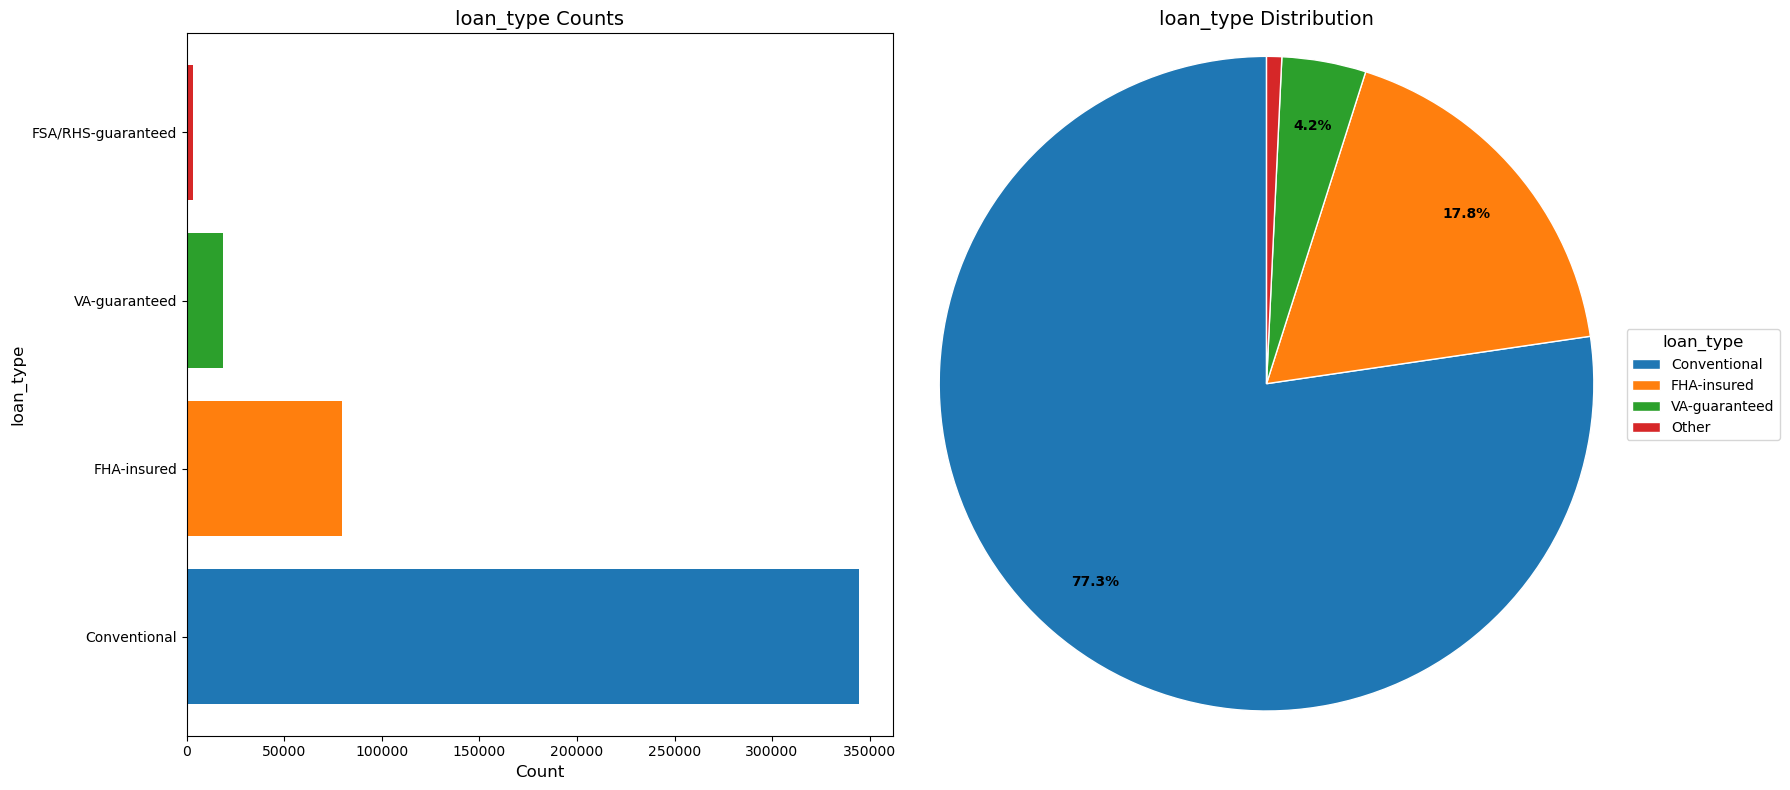

         loan_type Distribution Stats         
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ loan_type          ┃    Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Conventional       │ 344687.0 │     77.31% │
│ FHA-insured        │  79292.0 │     17.79% │
│ VA-guaranteed      │  18515.0 │      4.15% │
│ FSA/RHS-guaranteed │   3328.0 │      0.75% │
└────────────────────┴──────────┴────────────┘

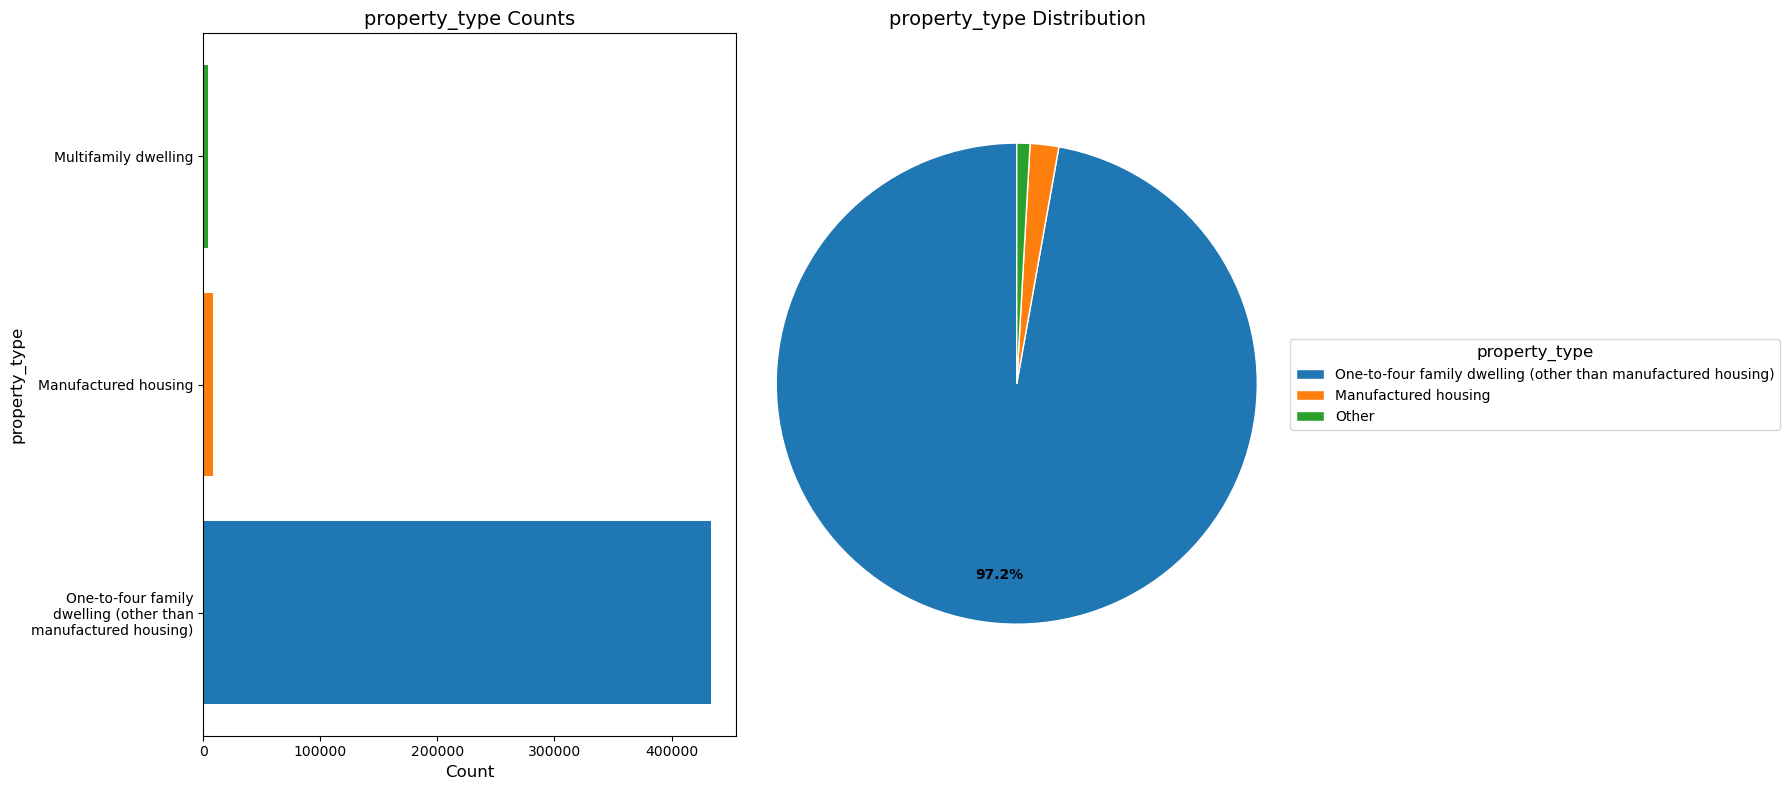

                            property_type Distribution Stats                             
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ property_type                                                 ┃    Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━┩
│ One-to-four family dwelling (other than manufactured housing) │ 433315.0 │     97.19% │
│ Manufactured housing                                          │   8564.0 │      1.92% │
│ Multifamily dwelling                                          │   3943.0 │      0.88% │
└───────────────────────────────────────────────────────────────┴──────────┴────────────┘

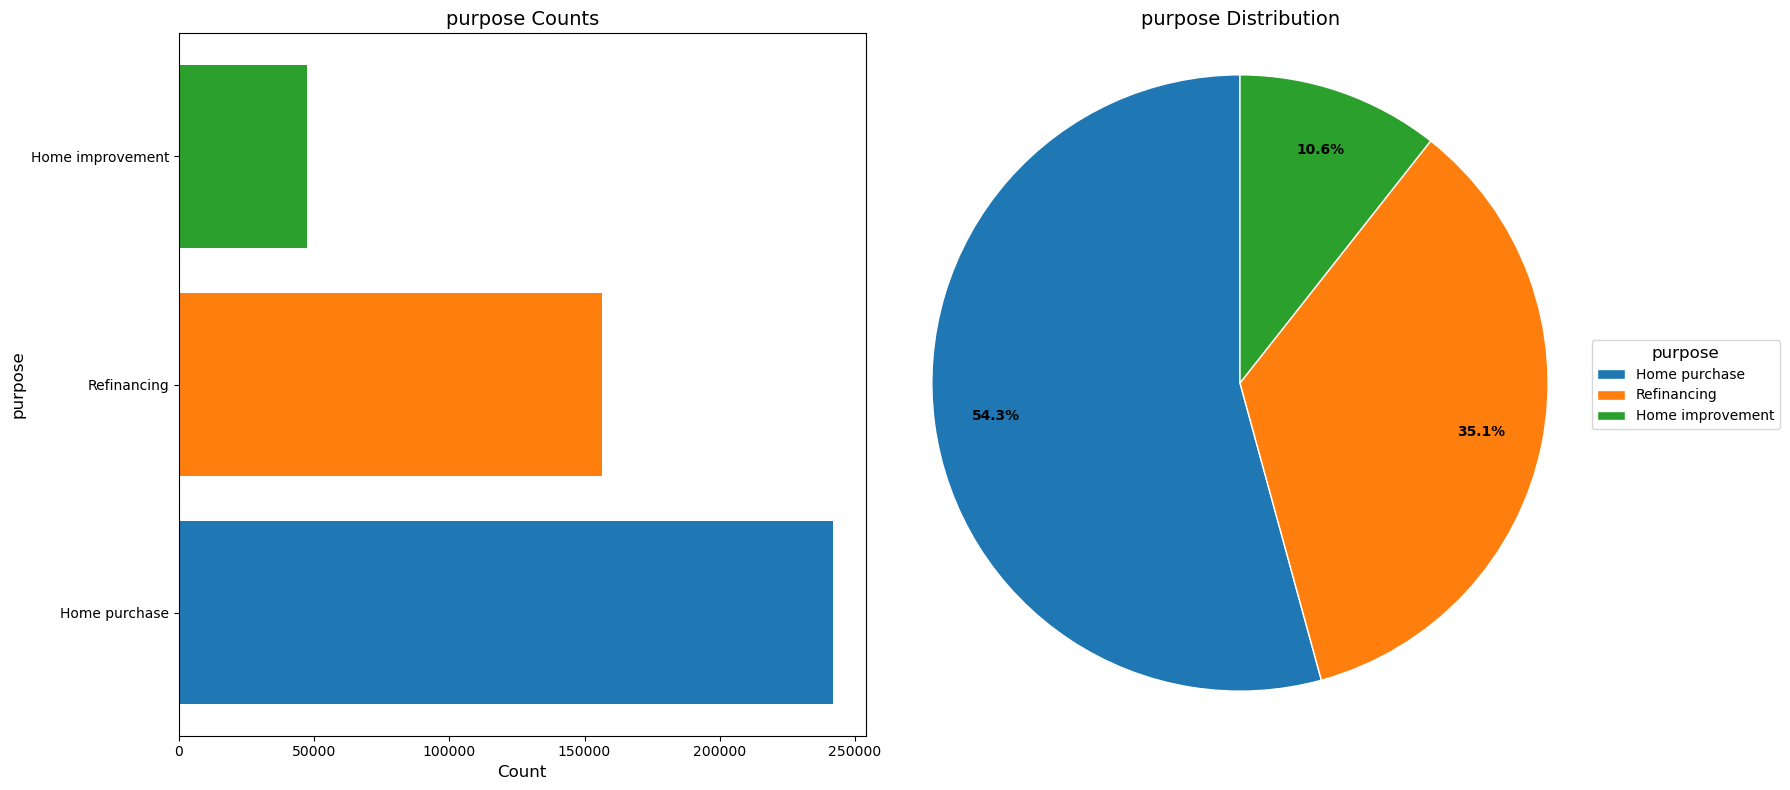

         purpose Distribution Stats         
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ purpose          ┃    Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Home purchase    │ 241876.0 │     54.25% │
│ Refinancing      │ 156616.0 │     35.13% │
│ Home improvement │  47330.0 │     10.62% │
└──────────────────┴──────────┴────────────┘

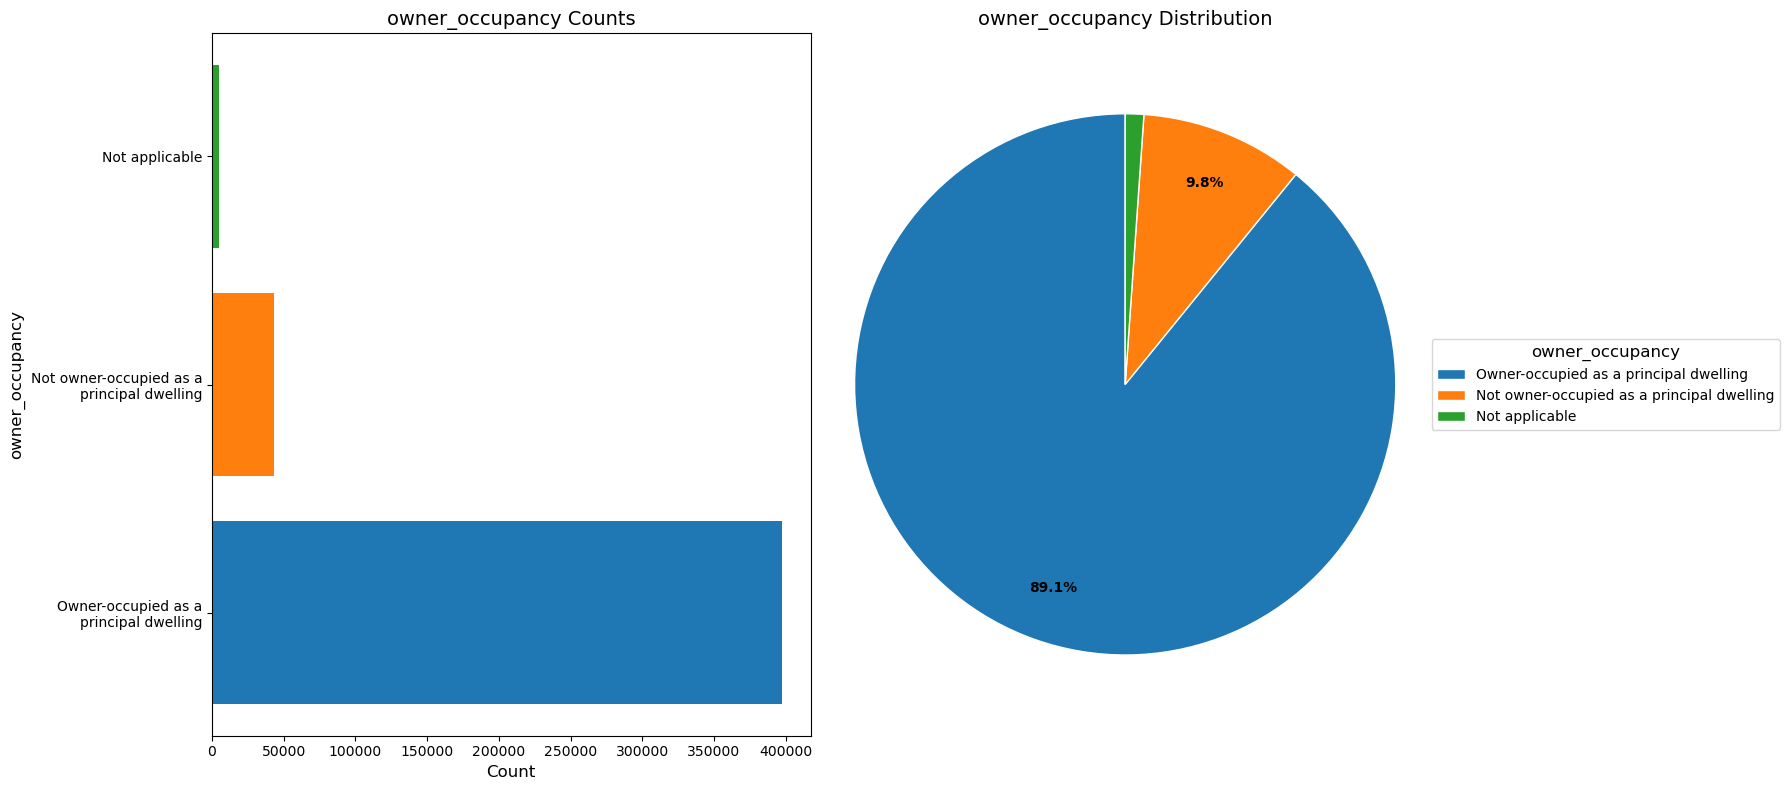

                  owner_occupancy Distribution Stats                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ owner_occupancy                            ┃    Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Owner-occupied as a principal dwelling     │ 397385.0 │     89.14% │
│ Not owner-occupied as a principal dwelling │  43511.0 │      9.76% │
│ Not applicable                             │   4926.0 │      1.10% │
└────────────────────────────────────────────┴──────────┴────────────┘

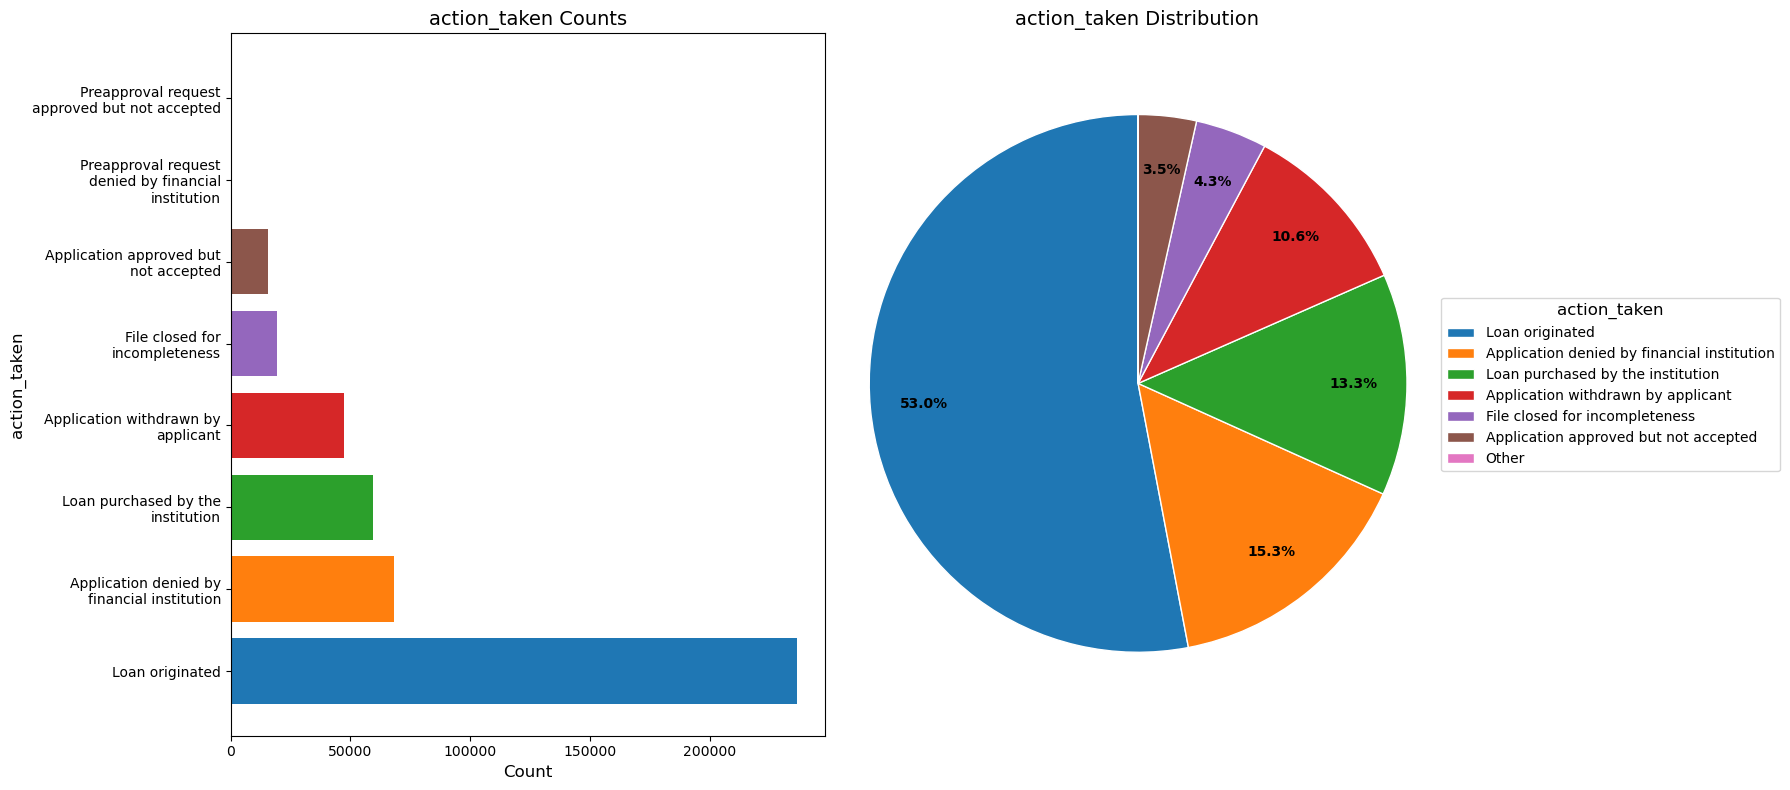

                        action_taken Distribution Stats                        
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ action_taken                                        ┃    Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Loan originated                                     │ 236275.0 │     53.00% │
│ Application denied by financial institution         │  68012.0 │     15.26% │
│ Loan purchased by the institution                   │  59472.0 │     13.34% │
│ Application withdrawn by applicant                  │  47305.0 │     10.61% │
│ File closed for incompleteness                      │  19190.0 │      4.30% │
│ Application approved but not accepted               │  15554.0 │      3.49% │
│ Preapproval request denied by financial institution │     11.0 │      0.00% │
│ Preapproval request approved but not accepted       │      3.0 │      0.00% │
└─────────────────────────────────────────────────────┴──────────┴────────────┘

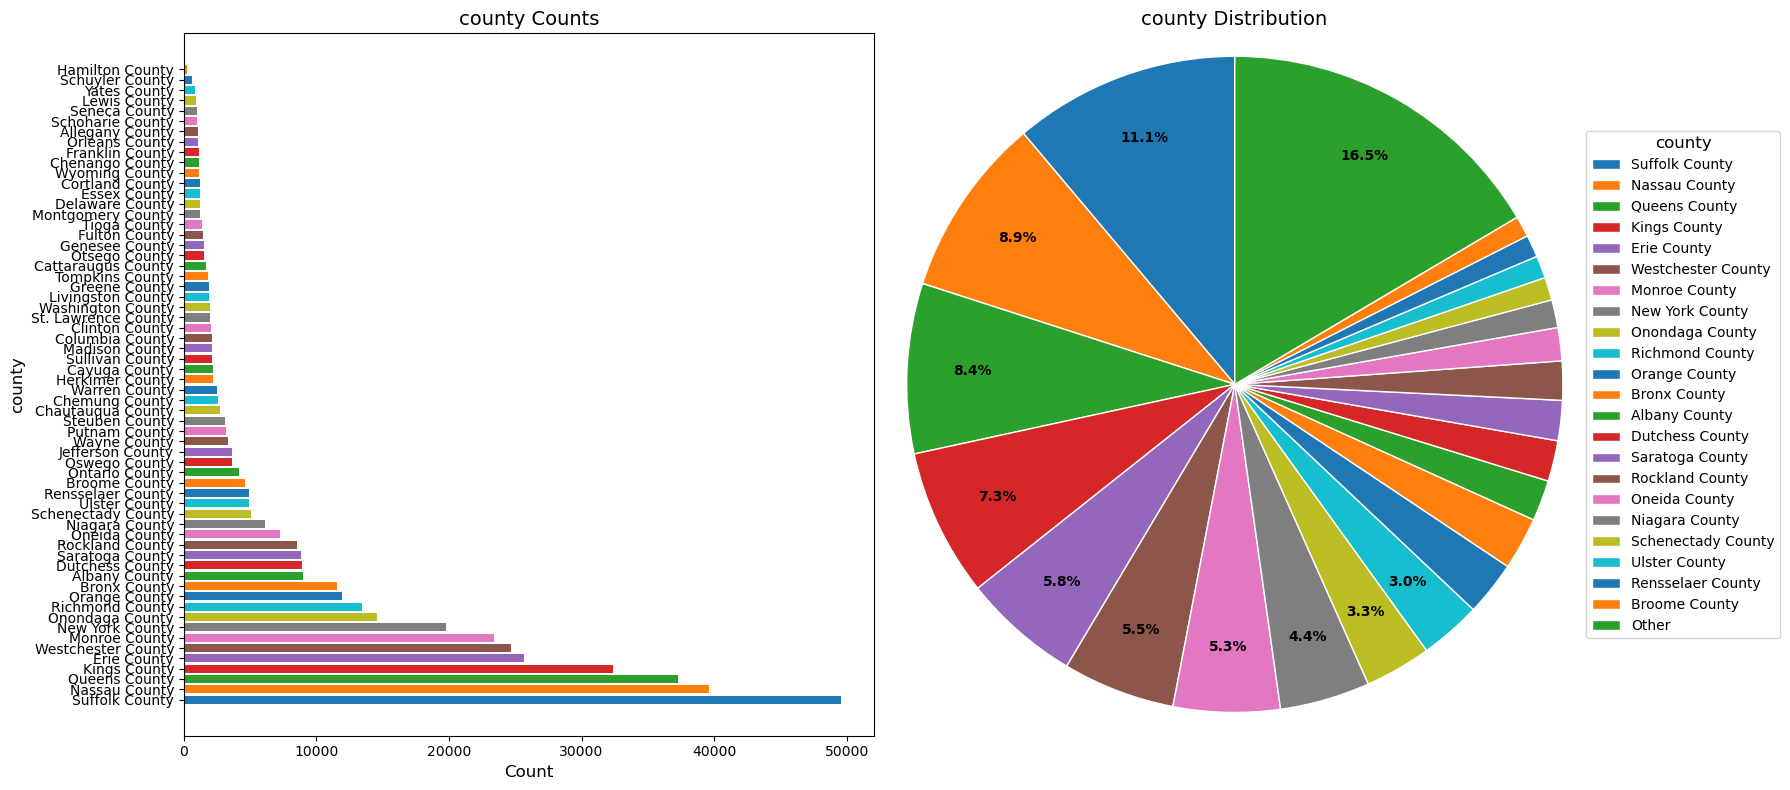

          county Distribution Stats           
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ county              ┃   Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ Suffolk County      │ 49596.0 │     11.12% │
│ Nassau County       │ 39589.0 │      8.88% │
│ Queens County       │ 37298.0 │      8.37% │
│ Kings County        │ 32356.0 │      7.26% │
│ Erie County         │ 25684.0 │      5.76% │
│ Westchester County  │ 24659.0 │      5.53% │
│ Monroe County       │ 23392.0 │      5.25% │
│ New York County     │ 19768.0 │      4.43% │
│ Onondaga County     │ 14553.0 │      3.26% │
│ Richmond County     │ 13432.0 │      3.01% │
│ Orange County       │ 11930.0 │      2.68% │
│ Bronx County        │ 11536.0 │      2.59% │
│ Albany County       │  8953.0 │      2.01% │
│ Dutchess County     │  8938.0 │      2.00% │
│ Saratoga County     │  8802.0 │      1.97% │
│ Rockland County     │  8557.0 │      1.92% │
│ Oneida County       │  7265.0 │      1.63% │
│ Niagara County      │  6107.0 │      1.37% │
│ Schenectady County  │  5028.0 │      1.13% │
│ Ulster County       │  4911.0 │      1.10% │
│ Rensselaer County   │  4888.0 │      1.10% │
│ Broome County       │  4590.0 │      1.03% │
│ Ontario County      │  4130.0 │      0.93% │
│ Oswego County       │  3646.0 │      0.82% │
│ Jefferson County    │  3629.0 │      0.81% │
│ Wayne County        │  3351.0 │      0.75% │
│ Putnam County       │  3153.0 │      0.71% │
│ Steuben County      │  3097.0 │      0.69% │
│ Chautauqua County   │  2690.0 │      0.60% │
│ Chemung County      │  2584.0 │      0.58% │
│ Warren County       │  2481.0 │      0.56% │
│ Herkimer County     │  2231.0 │      0.50% │
│ Cayuga County       │  2189.0 │      0.49% │
│ Sullivan County     │  2126.0 │      0.48% │
│ Madison County      │  2116.0 │      0.47% │
│ Columbia County     │  2116.0 │      0.47% │
│ Clinton County      │  2061.0 │      0.46% │
│ St. Lawrence County │  1984.0 │      0.45% │
│ Washington County   │  1933.0 │      0.43% │
│ Livingston County   │  1887.0 │      0.42% │
│ Greene County       │  1878.0 │      0.42% │
│ Tompkins County     │  1851.0 │      0.42% │
│ Cattaraugus County  │  1701.0 │      0.38% │
│ Otsego County       │  1495.0 │      0.34% │
│ Genesee County      │  1482.0 │      0.33% │
│ Fulton County       │  1423.0 │      0.32% │
│ Tioga County        │  1392.0 │      0.31% │
│ Montgomery County   │  1196.0 │      0.27% │
│ Delaware County     │  1192.0 │      0.27% │
│ Essex County        │  1188.0 │      0.27% │
│ Cortland County     │  1185.0 │      0.27% │
│ Wyoming County      │  1152.0 │      0.26% │
│ Chenango County     │  1126.0 │      0.25% │
│ Franklin County     │  1103.0 │      0.25% │
│ Orleans County      │  1082.0 │      0.24% │
│ Allegany County     │  1068.0 │      0.24% │
│ Schoharie County    │   961.0 │      0.22% │
│ Seneca County       │   956.0 │      0.21% │
│ Lewis County        │   903.0 │      0.20% │
│ Yates County        │   843.0 │      0.19% │
│ Schuyler County     │   624.0 │      0.14% │
│ Hamilton County     │   233.0 │      0.05% │
└─────────────────────┴─────────┴────────────┘

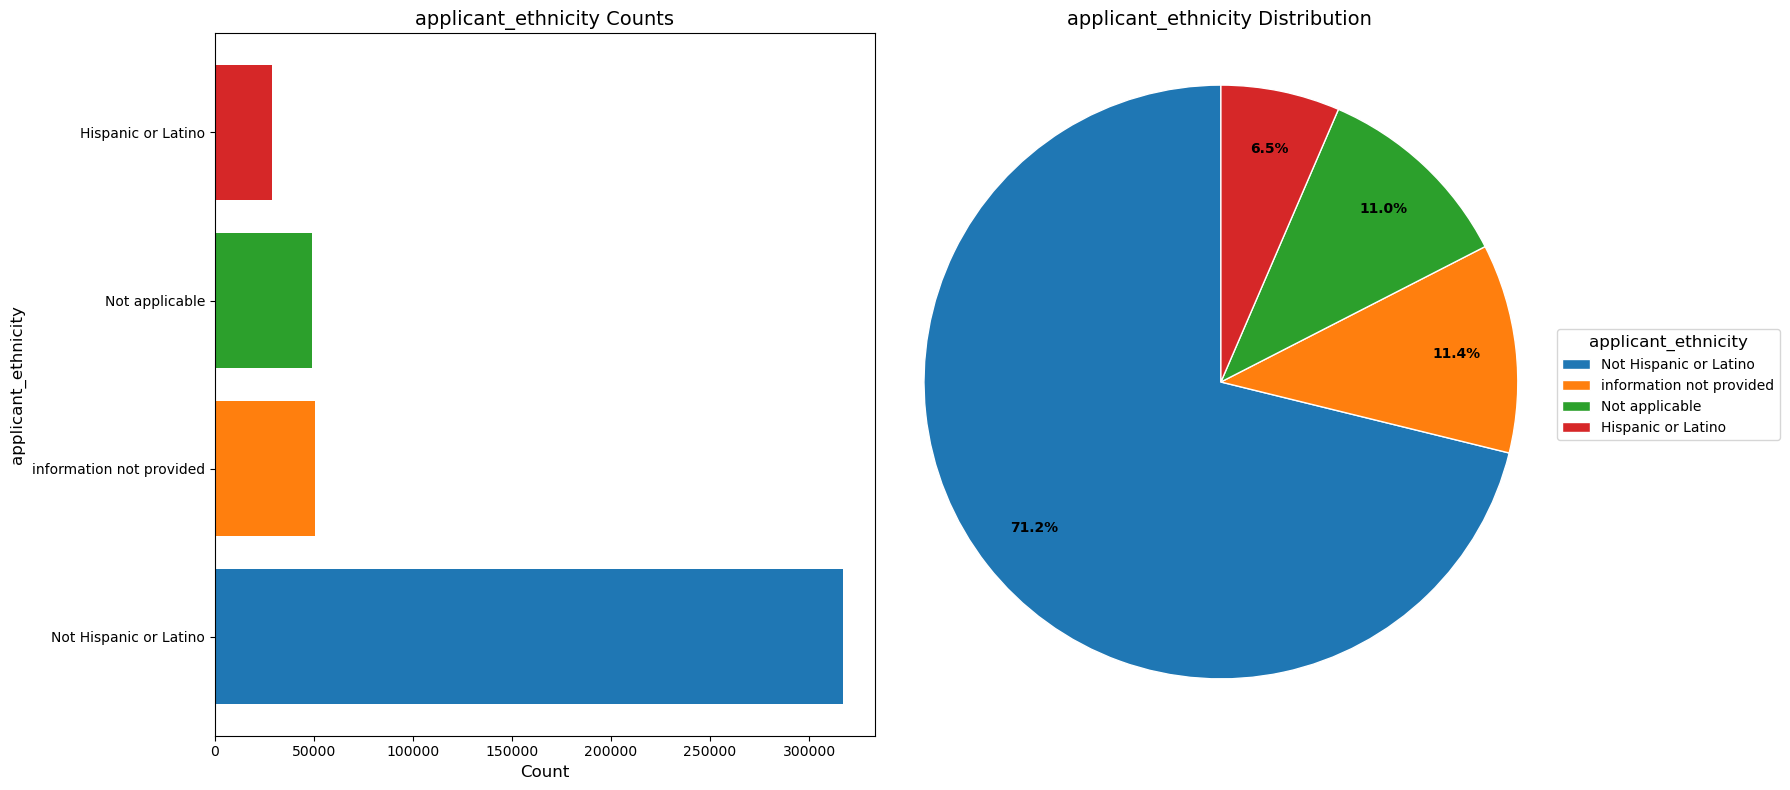

       applicant_ethnicity Distribution Stats       
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ applicant_ethnicity      ┃    Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Not Hispanic or Latino   │ 317231.0 │     71.16% │
│ information not provided │  50744.0 │     11.38% │
│ Not applicable           │  48968.0 │     10.98% │
│ Hispanic or Latino       │  28879.0 │      6.48% │
└──────────────────────────┴──────────┴────────────┘

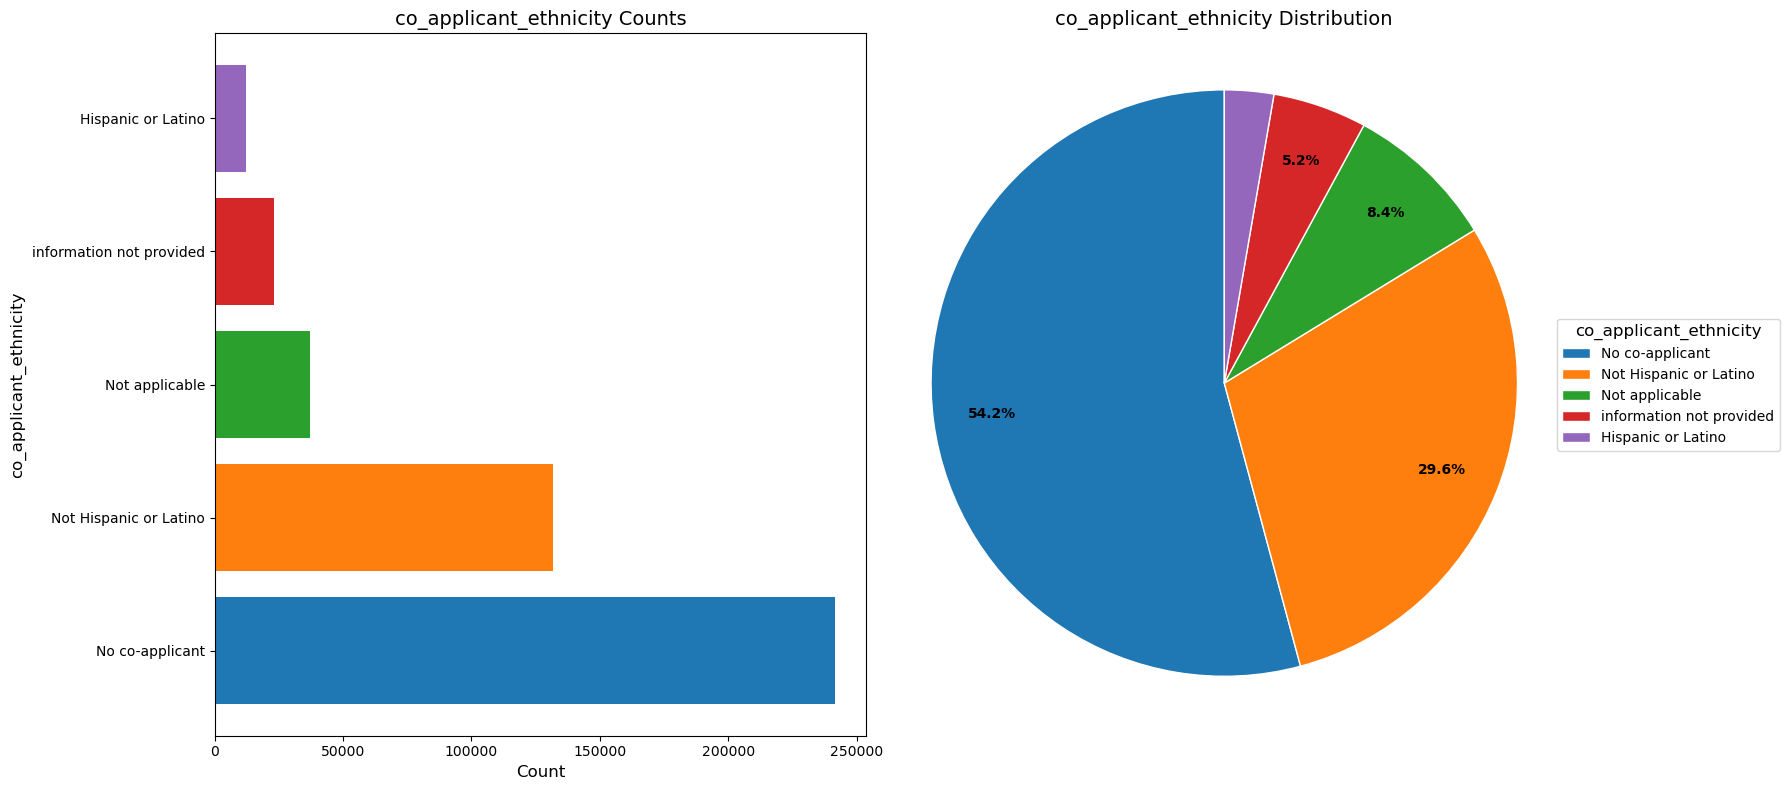

     co_applicant_ethnicity Distribution Stats      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ co_applicant_ethnicity   ┃    Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━┩
│ No co-applicant          │ 241573.0 │     54.19% │
│ Not Hispanic or Latino   │ 131756.0 │     29.55% │
│ Not applicable           │  37278.0 │      8.36% │
│ information not provided │  23115.0 │      5.18% │
│ Hispanic or Latino       │  12100.0 │      2.71% │
└──────────────────────────┴──────────┴────────────┘

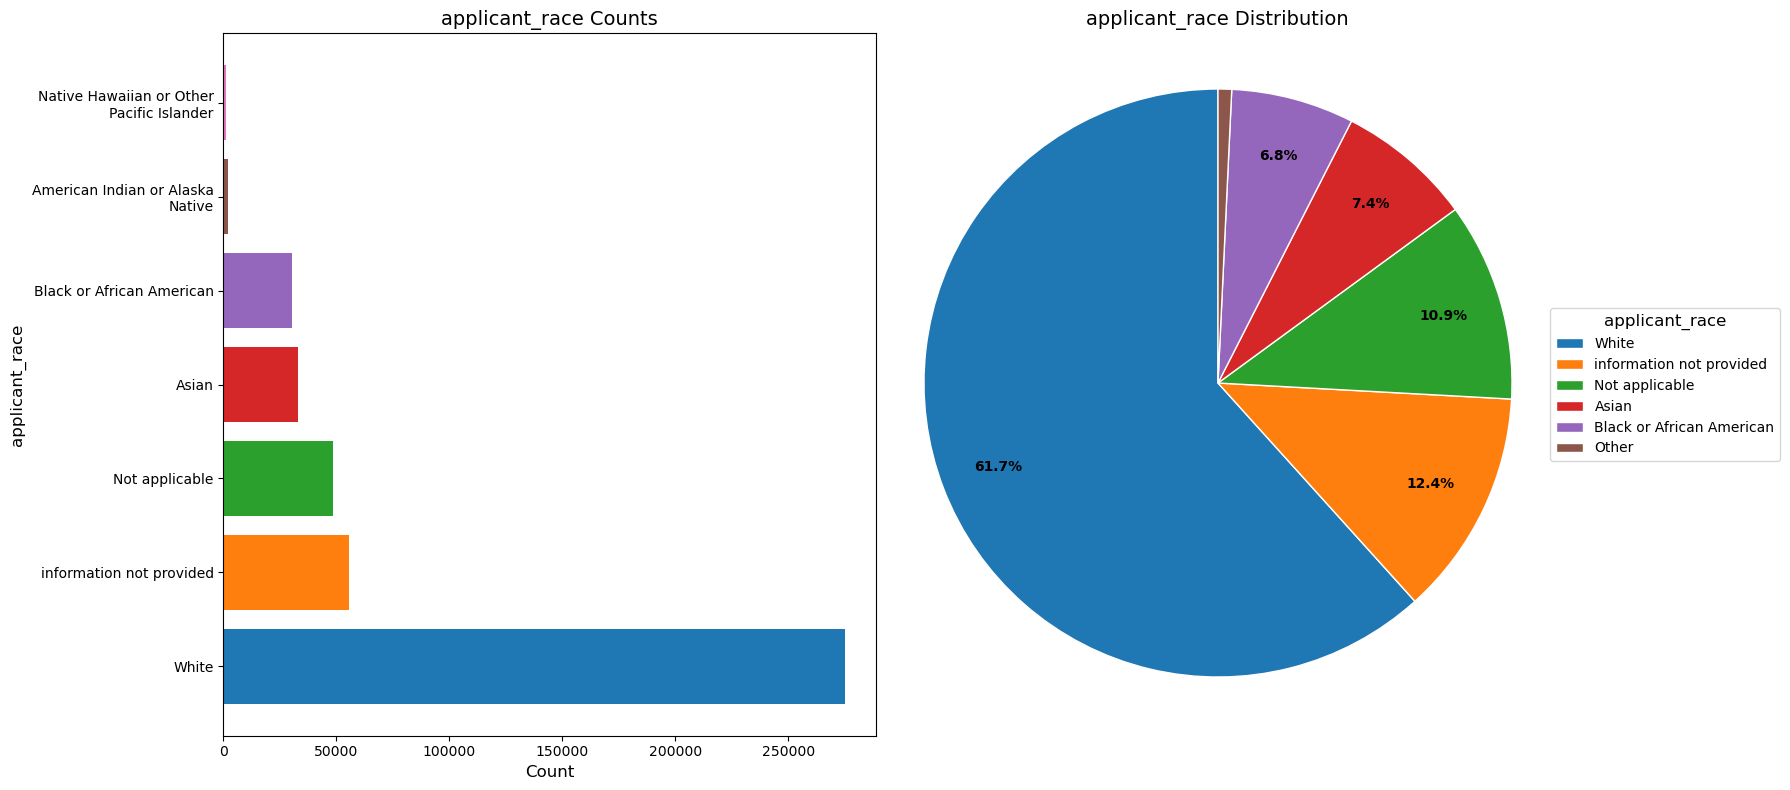

                  applicant_race Distribution Stats                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ applicant_race                            ┃    Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━┩
│ White                                     │ 274997.0 │     61.68% │
│ information not provided                  │  55493.0 │     12.45% │
│ Not applicable                            │  48684.0 │     10.92% │
│ Asian                                     │  33193.0 │      7.45% │
│ Black or African American                 │  30129.0 │      6.76% │
│ American Indian or Alaska Native          │   2030.0 │      0.46% │
│ Native Hawaiian or Other Pacific Islander │   1296.0 │      0.29% │
└───────────────────────────────────────────┴──────────┴────────────┘

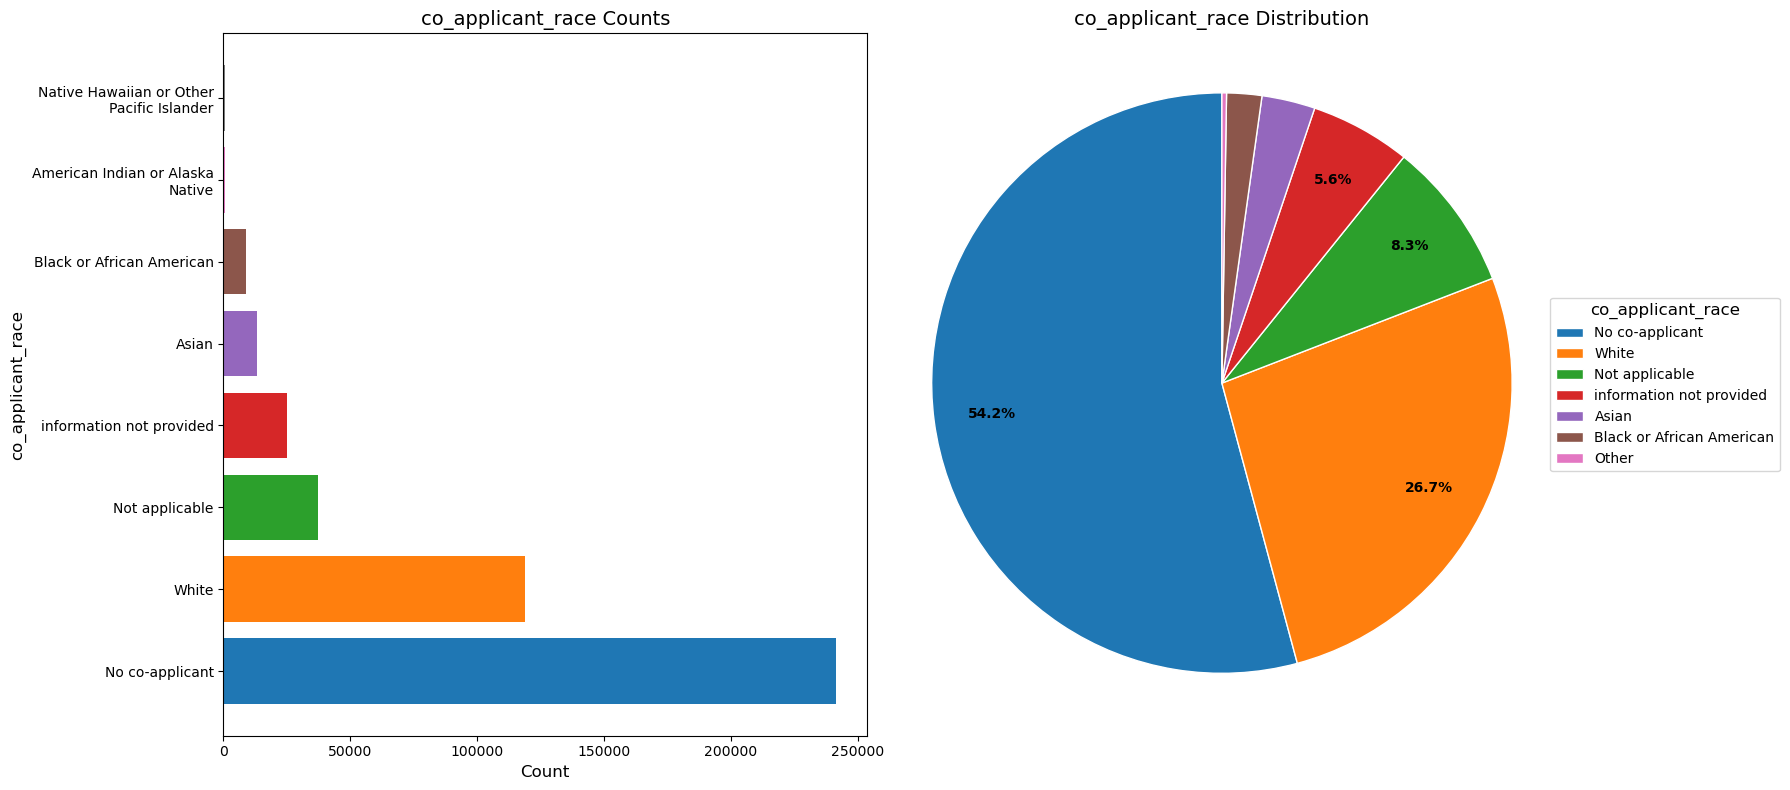

                co_applicant_race Distribution Stats                 
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ co_applicant_race                         ┃    Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━┩
│ No co-applicant                           │ 241573.0 │     54.19% │
│ White                                     │ 119001.0 │     26.69% │
│ Not applicable                            │  37168.0 │      8.34% │
│ information not provided                  │  24986.0 │      5.60% │
│ Asian                                     │  13242.0 │      2.97% │
│ Black or African American                 │   8714.0 │      1.95% │
│ American Indian or Alaska Native          │    588.0 │      0.13% │
│ Native Hawaiian or Other Pacific Islander │    550.0 │      0.12% │
└───────────────────────────────────────────┴──────────┴────────────┘

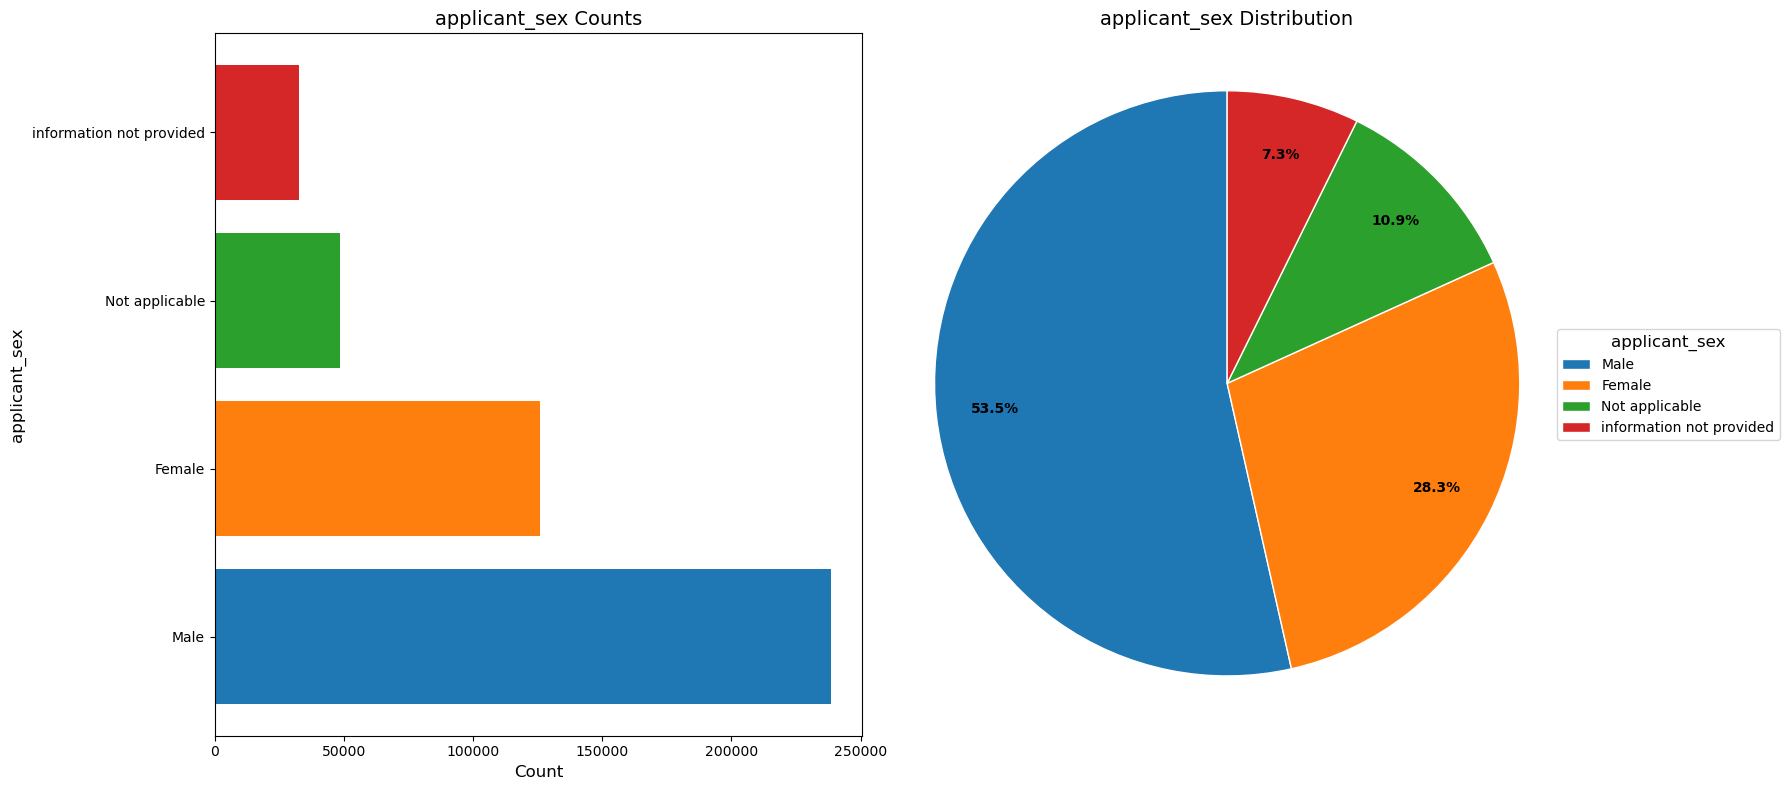

          applicant_sex Distribution Stats          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ applicant_sex            ┃    Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Male                     │ 238635.0 │     53.53% │
│ Female                   │ 125952.0 │     28.25% │
│ Not applicable           │  48651.0 │     10.91% │
│ information not provided │  32584.0 │      7.31% │
└──────────────────────────┴──────────┴────────────┘

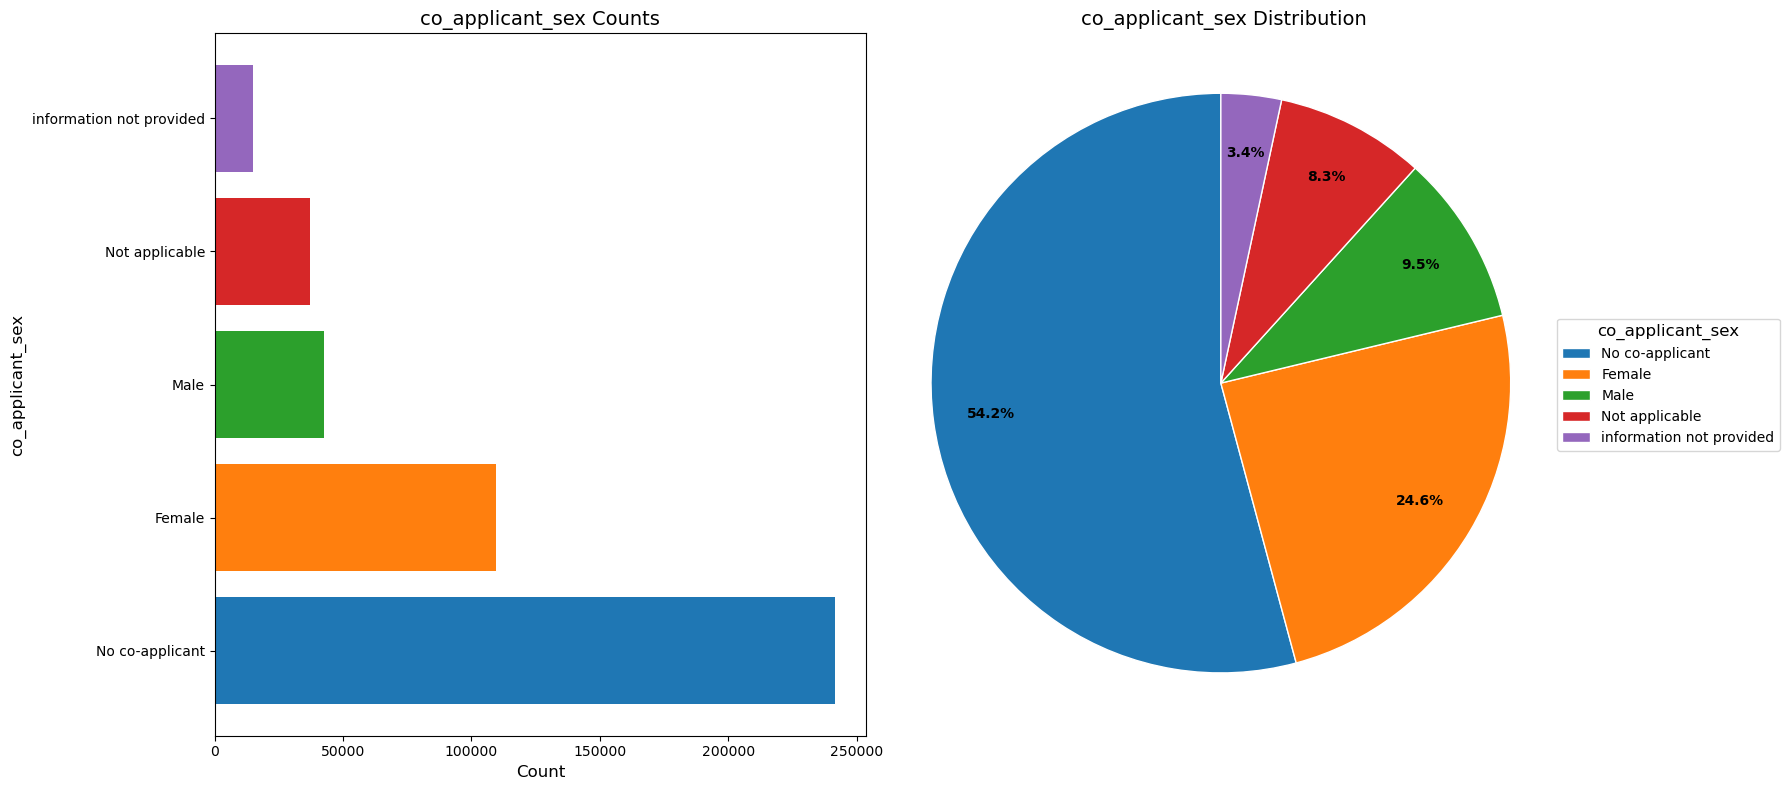

        co_applicant_sex Distribution Stats         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ co_applicant_sex         ┃    Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━┩
│ No co-applicant          │ 241573.0 │     54.19% │
│ Female                   │ 109564.0 │     24.58% │
│ Male                     │  42538.0 │      9.54% │
│ Not applicable           │  37146.0 │      8.33% │
│ information not provided │  15001.0 │      3.36% │
└──────────────────────────┴──────────┴────────────┘

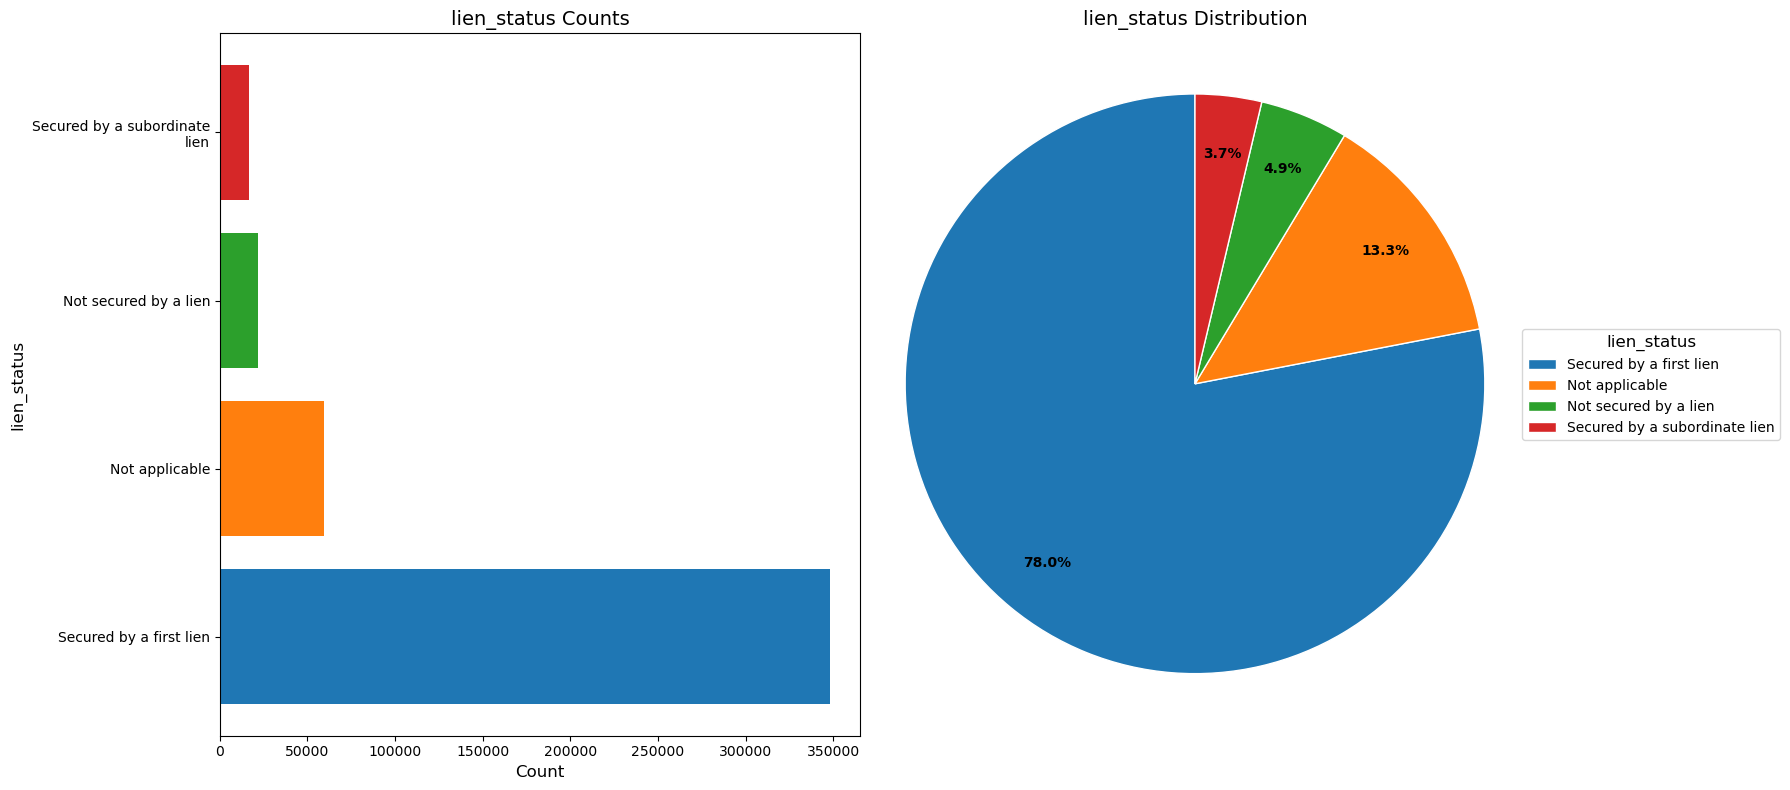

             lien_status Distribution Stats              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ lien_status                   ┃    Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Secured by a first lien       │ 347902.0 │     78.04% │
│ Not applicable                │  59472.0 │     13.34% │
│ Not secured by a lien         │  21932.0 │      4.92% │
│ Secured by a subordinate lien │  16516.0 │      3.70% │
└───────────────────────────────┴──────────┴────────────┘





All categorical statistics have been saved to 'my_categorical_stats.csv'


,loan_type,Count,Percentage,Category,property_type,purpose,owner_occupancy,action_taken,county,applicant_ethnicity,co_applicant_ethnicity,applicant_race,co_applicant_race,applicant_sex,co_applicant_sex,lien_status
0,Conventional,344687,77.314937,loan_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FHA-insured,79292,17.785574,loan_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VA-guaranteed,18515,4.153003,loan_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FSA/RHS-guaranteed,3328,0.746486,loan_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,433315,97.194620,property_type,One-to-four family dwelling (other than manufa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,NaN,15001,3.364796,co_applicant_sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,information not provided,NaN
116,NaN,347902,78.036077,lien_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Secured by a first lien
117,NaN,59472,13.339853,lien_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable
118,NaN,21932,4.919452,lien_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not secured by a lien


In [46]:
#save_all_categorical_stats_to_csv(df, categorical_cols, 'my_categorical_stats.csv')

In [47]:
# # SECTION 2.2: NUMERICAL UNIVARIATE ANALYSIS
print("="*110)
print("SECTION 2.2: NUMERICAL UNIVARIATE ANALYSIS")


SECTION 2.2: NUMERICAL UNIVARIATE ANALYSIS


In [48]:
print(numerical_cols)

Index(['loan_amount_k', 'census_tract', 'applicant_income_k',
       'median_family_income', 'relative_neighborhood_income'],
      dtype='object')


In [49]:
# ## 2.2.1 Distribution Statistics
# Calculate summary statistics for all numerical features
print("2.2.1 Distributoon statistacs")
stats_df = df[numerical_cols].agg(['mean', 'median', 'std', 'min', 'max', 'skew']).T

#Create an interactive widget for better display in Jupyter
output = widgets.Output()
with output:
    display(stats_df.style.format(precision=3).set_properties(**{'text-align': 'center'}).set_table_styles(
        [{'selector': 'th', 'props': [('font-size', '14px'), ('text-align', 'center')]}]
    ))

# Display the styled table with comprehensive statistics for each numerical feature
display(output)

2.2.1 Distributoon statistacs


Output()

Figure saved to numerical_plots/loan_amount_k_distribution.png
Figure saved to numerical_plots/census_tract_distribution.png
Figure saved to numerical_plots/applicant_income_k_distribution.png
Figure saved to numerical_plots/median_family_income_distribution.png
Figure saved to numerical_plots/relative_neighborhood_income_distribution.png


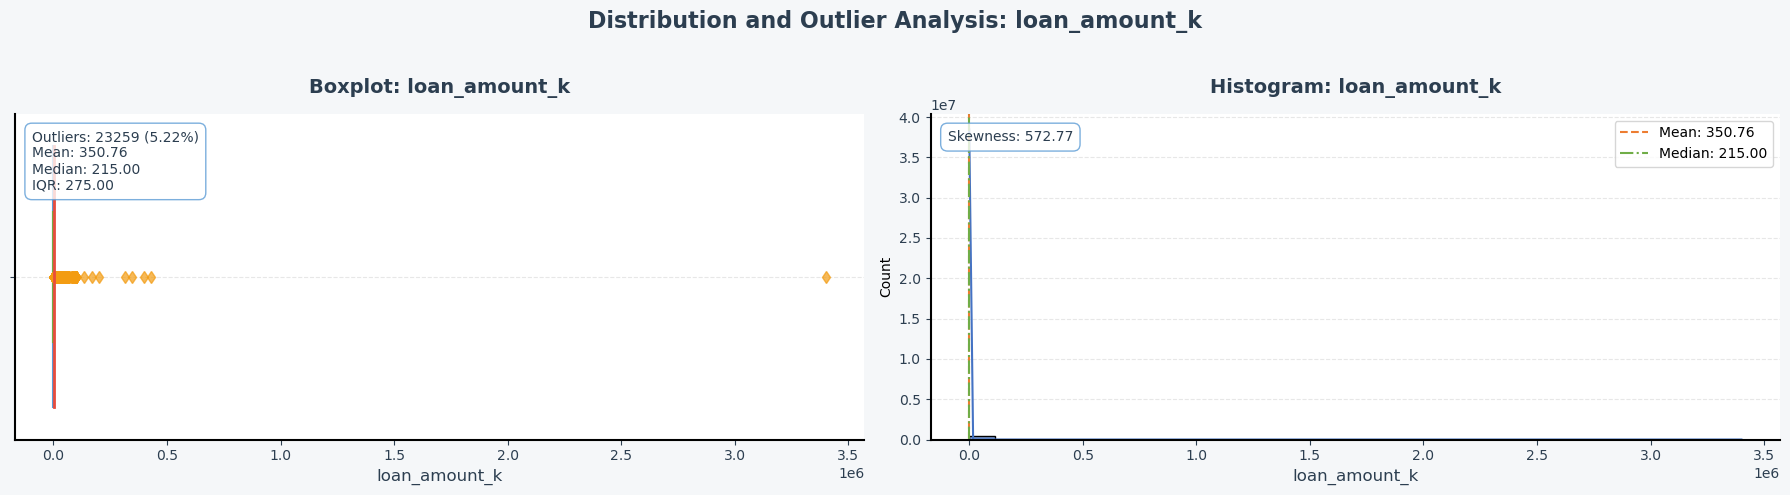

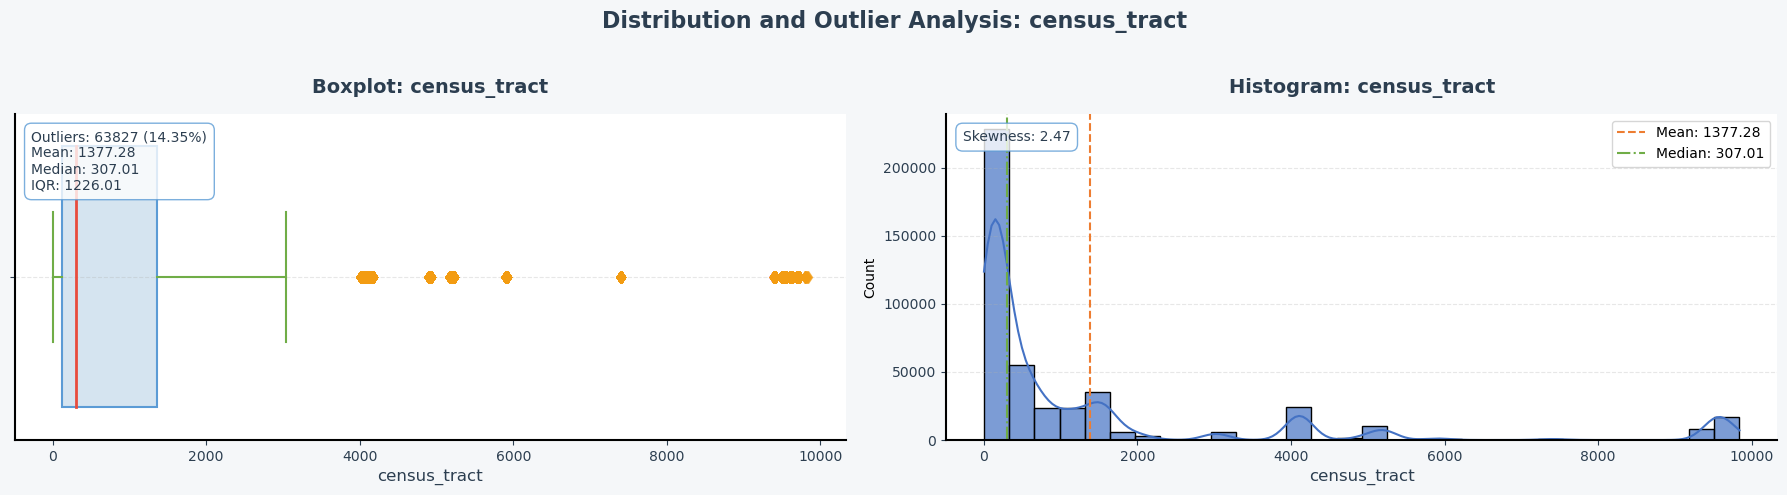

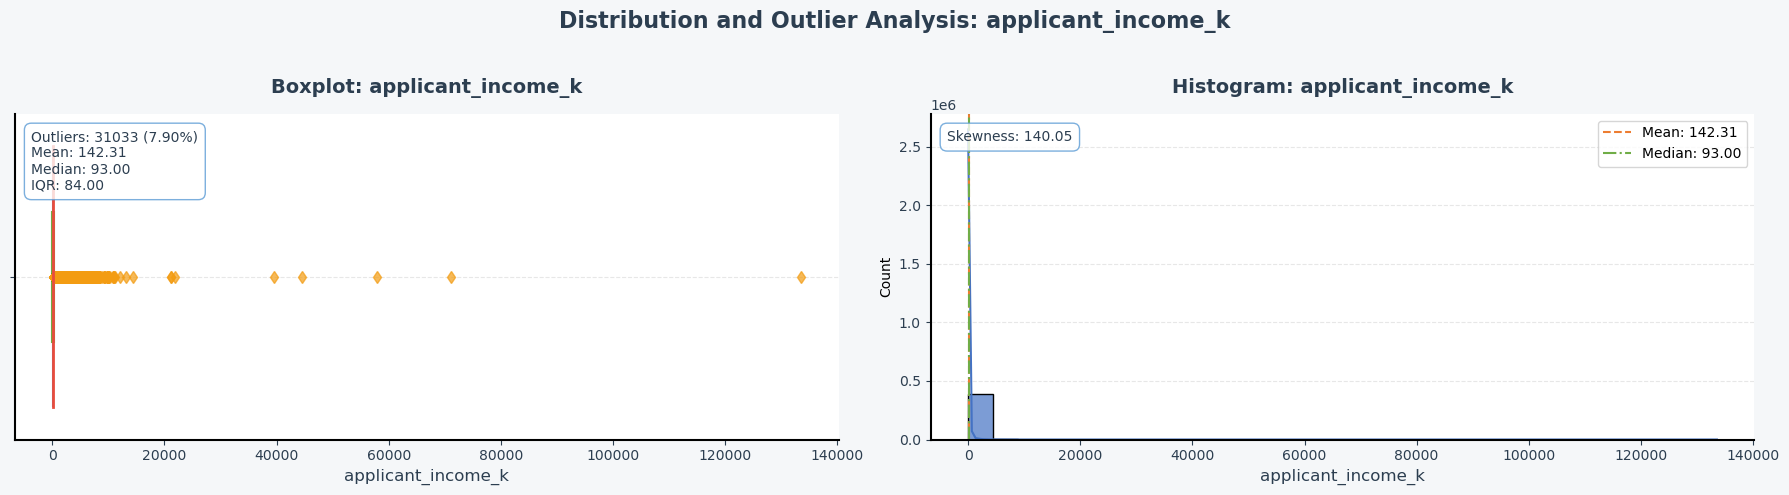

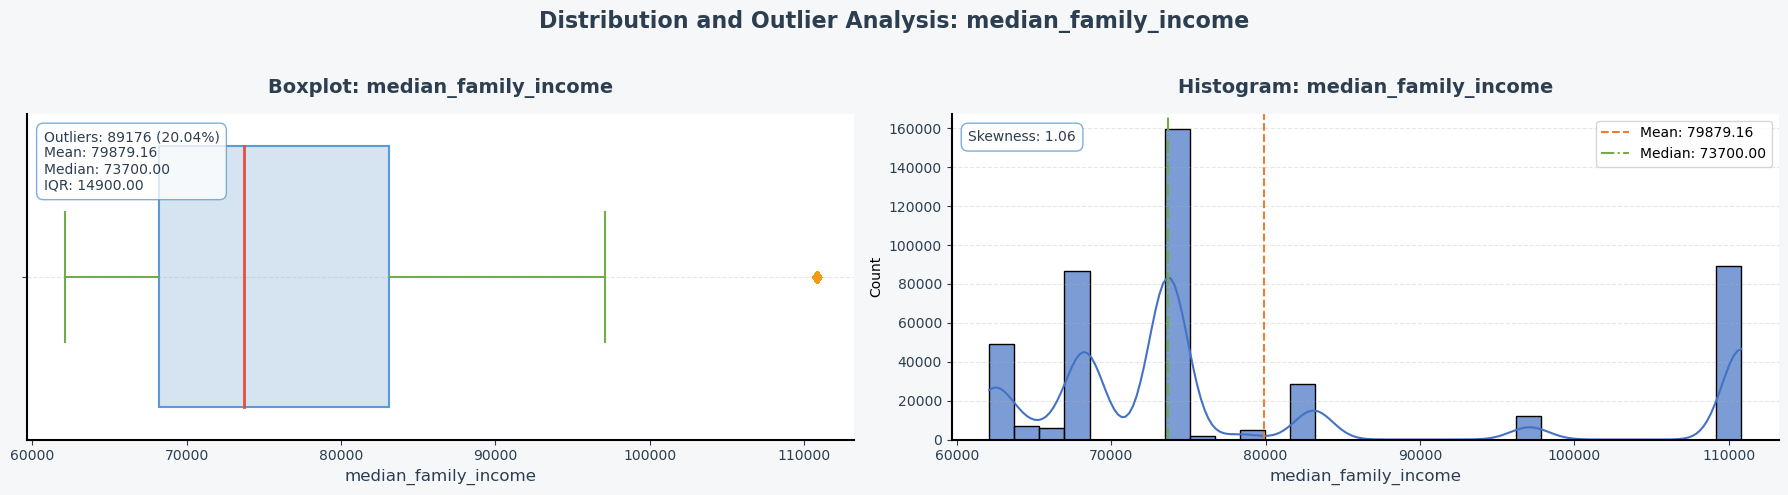

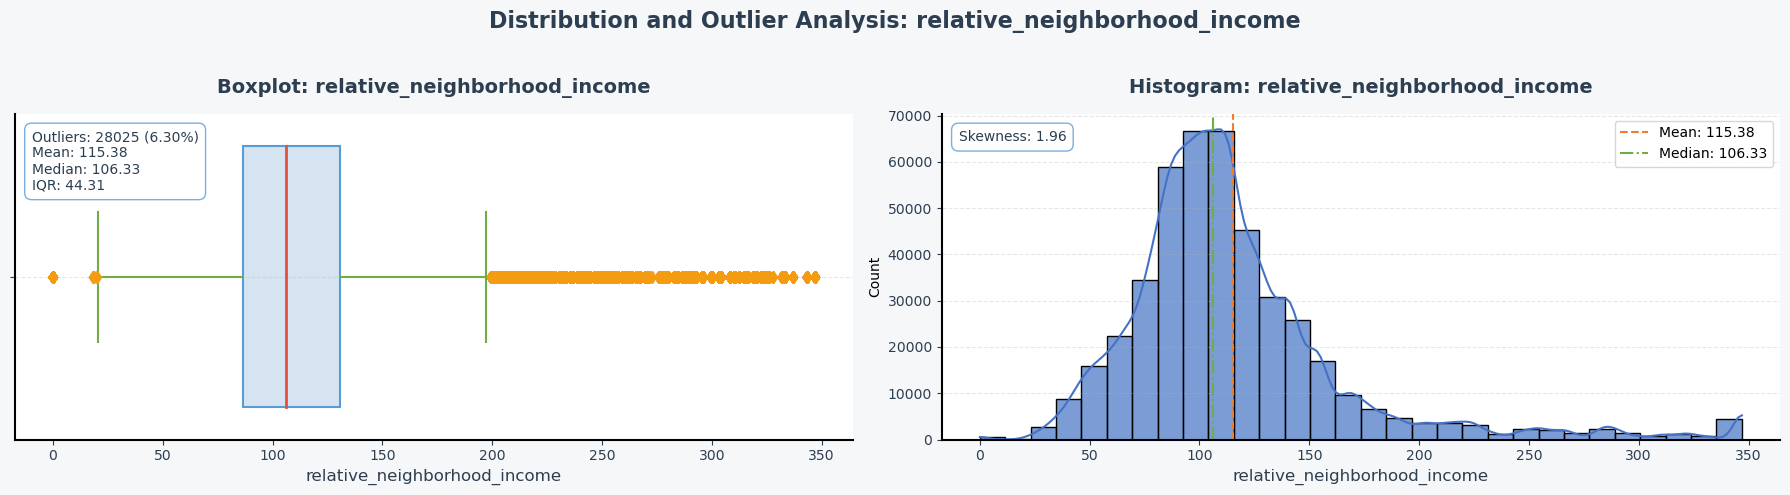

In [50]:
def plot_distribution_and_boxplot(dataframe, columns, bins=30, save_dir=None):
    """
    Creates side-by-side boxplots and histograms for numerical features.
    Saves each variable's visualization (boxplot + histogram) as a separate file.
    
    Args:
        dataframe: The pandas dataframe containing the data
        columns: List of numerical columns to plot
        bins: Number of histogram bins
        save_dir: Directory to save figures. If None, figures are not saved.
                 Files will be named '{column_name}_distribution.png'
        
    Returns:
        List of matplotlib figure objects
    """
    # Modern color palette for visual appeal and readability
    box_color = '#5B9BD5'  # Microsoft blue
    box_fill = '#D0E4F5'   # Light blue fill
    whisker_color = '#70AD47'  # Green 
    median_color = '#E84C3D'  # Vibrant red
    outlier_color = '#F39C12'  # Orange for outliers
    text_color = '#2C3E50'  # Dark blue-grey for text
    hist_color = '#4472C4'  # Blue for histogram
    
    figures = []  # To store all figure objects
    
    for col in columns:
        # Create a new figure for each variable with 1 row and 2 columns
        fig, axes = plt.subplots(1, 2, figsize=(18, 5))
        fig.patch.set_facecolor('#F5F7F9')  # Light blue-grey background
        
        data = dataframe[col].dropna()
        
        # Set subplot background color
        for j in range(2):
            axes[j].set_facecolor('#FFFFFF')  # White background for each subplot
        
        # Left column: Boxplot
        # Calculate statistics for outlier detection using IQR method
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((data < lower_bound) | (data > upper_bound)).sum()
        outlier_percent = outliers/len(data)*100
        
        # Enhanced boxplot with custom styling
        sns.boxplot(
            x=data, 
            ax=axes[0],
            color=box_fill,  # Box fill color
            boxprops={'edgecolor': box_color, 'linewidth': 1.5},  # Box edge color
            whiskerprops={'color': whisker_color, 'linewidth': 1.5},  # Whisker color
            medianprops={'color': median_color, 'linewidth': 2},  # Median line color
            capprops={'color': whisker_color, 'linewidth': 1.5},  # Cap color
            flierprops={'markerfacecolor': outlier_color, 'markeredgecolor': outlier_color, 'markersize': 6, 'alpha': 0.7}  # Outlier color
        )
        
        # title 
        axes[0].set_title(f"Boxplot: {col}", fontsize=14, fontweight='bold', color=text_color, pad=15)
        
        # Add statistics as text annotation for better interpretation
        stats_text = (f"Outliers: {outliers} ({outlier_percent:.2f}%)\n"
                     f"Mean: {data.mean():.2f}\n"
                     f"Median: {data.median():.2f}\n"
                     f"IQR: {IQR:.2f}")
        
        # text box with statistics for easy reference
        axes[0].text(0.02, 0.95, stats_text, transform=axes[0].transAxes,
                     bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5', 
                              edgecolor=box_color),
                     verticalalignment='top', fontsize=10, color=text_color)
        
        # Styling for axes to improve readability
        axes[0].spines['top'].set_visible(False)
        axes[0].spines['right'].set_visible(False)
        axes[0].spines['left'].set_linewidth(1.5)
        axes[0].spines['bottom'].set_linewidth(1.5)
        axes[0].tick_params(axis='both', colors=text_color)
        axes[0].set_xlabel(col, fontsize=12, fontweight='medium', color=text_color)
        
        # grid 
        axes[0].grid(axis='y', linestyle='--', alpha=0.3)
        
        #Right column: Histogram
        sns.histplot(data, kde=True, bins=bins, ax=axes[1], 
                    alpha=0.7, color=hist_color)
        
        axes[1].set_title(f"Histogram: {col}", fontsize=14, fontweight='bold', color=text_color, pad=15)
        
        #  reference lines
        mean_val = data.mean()
        median_val = data.median()
        axes[1].axvline(mean_val, color='#ED7D31', linestyle='--', 
                        label=f'Mean: {mean_val:.2f}')
        axes[1].axvline(median_val, color='#70AD47', linestyle='-.', 
                        label=f'Median: {median_val:.2f}')
        
        #skewness information
        skewness = data.skew()
        skew_text = f"Skewness: {skewness:.2f}"
        axes[1].text(0.02, 0.95, skew_text, transform=axes[1].transAxes,
                     bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5', 
                              edgecolor=box_color),
                     verticalalignment='top', fontsize=10, color=text_color)
        
        axes[1].legend()
        
        #Style histogram axes
        axes[1].spines['top'].set_visible(False)
        axes[1].spines['right'].set_visible(False)
        axes[1].spines['left'].set_linewidth(1.5)
        axes[1].spines['bottom'].set_linewidth(1.5)
        axes[1].tick_params(axis='both', colors=text_color)
        axes[1].set_xlabel(col, fontsize=12, fontweight='medium', color=text_color)
        axes[1].grid(axis='y', linestyle='--', alpha=0.3)
        
        #title for the entire figure
        fig.suptitle(f'Distribution and Outlier Analysis: {col}', 
                    fontsize=16, fontweight='bold', color=text_color, y=0.98)
        
        # Adjust layout
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        
        # Saves the figure if a directory is provided
        if save_dir:
            import os
            # Create directory if it doesn't exist
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)
                
            # Create filename based on column name
            filename = os.path.join(save_dir, f"{col}_distribution.png")
            fig.savefig(filename, dpi=300, bbox_inches='tight')
            print(f"Figure saved to {filename}")
        
        figures.append(fig)
    
    return figures

# Example usage:
# All numerical columns
figs = plot_distribution_and_boxplot(df, numerical_cols, save_dir='numerical_plots')
plt.show()

In [186]:
# # SECTION 3: BIVARIATE ANALYSIS
# Examine relationships between individual features and the loan approval status (target variable)

print("\n" + "="*110)
print("SECTION 3: BIVARIATE ANALYSIS")
print("="*110)


SECTION 3: BIVARIATE ANALYSIS


In [187]:
def plot_stacked_bar_chart(col_x, col_y, save=False):
    """
    Create a stacked bar chart using df, grouping by col_x and col_y.
    
    Parameters:
      col_x (str): Column to use for the x-axis.
      col_y (str): Column to group by within each x value.
      save (bool): If True, saves the plot in the 'bivariate_plots' folder. Default is False.
      
    The chart title will be 'col_x vs col_y (Stacked)' and the legend is placed outside the plot.
    Long x-axis labels are wrapped for better readability.
    """
    # Filter out rows where col_x is missing
    df_filtered = df[df[col_x].notna()]
    
    # Group by col_x and col_y, and count rows
    counts = (df_filtered.groupby([col_x, col_y])
              .size()
              .reset_index(name='Count'))
    
    # Pivot the data so each unique value in col_y becomes a separate column
    pivot_df = counts.pivot(index=col_x, columns=col_y, values='Count').fillna(0)
    
    # Plot the stacked bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    pivot_df.plot(kind='bar', stacked=True, ax=ax, edgecolor='white')
    
    ax.set_xlabel(col_x)
    ax.set_ylabel('Count')
    ax.set_title(f'{col_x} vs {col_y} (Stacked)')
    plt.xticks(rotation=90)
    
    # Wrap x-axis labels for better readability
    new_labels = [textwrap.fill(label.get_text(), width=12) for label in ax.get_xticklabels()]
    ax.set_xticklabels(new_labels)
    
    # Place the legend outside the plot
    ax.legend(title=col_y, loc='upper left', bbox_to_anchor=(1, 1),
              fontsize='small', title_fontsize='small')
    
    plt.tight_layout()
    
    # Save the plot if the save option is True
    if save:
        import os
        if not os.path.exists('bivariate_plots'):
            os.makedirs('bivariate_plots')
        # Construct a filename based on the column names
        file_name = f"bivariate_plots/stacked_{col_x}_vs_{col_y}.png"
        plt.savefig(file_name)
        print(f"Plot saved as {file_name}")
    
    plt.show()


In [188]:

def plot_grouped_bar_chart(col_x, col_y, save=False):
    """
    Create a grouped (non-stacked) bar chart using df, grouping by col_x and col_y.
    
    Parameters:
      col_x (str): Column to use for the x-axis.
      col_y (str): Column to group by within each x value.
      
    The chart title will be 'col_x vs col_y (Grouped)' and the legend is placed outside the plot.
    Long x-axis labels are wrapped for better readability.
    """
    # Filter out rows where col_x is missing
    df_filtered = df[df[col_x].notna()]
    
    # Group by col_x and col_y, and count rows
    counts = (df_filtered.groupby([col_x, col_y])
              .size()
              .reset_index(name='Count'))
    
    # Pivot the data so each unique value in col_y becomes a separate column
    pivot_df = counts.pivot(index=col_x, columns=col_y, values='Count').fillna(0)
    
    # Plot the grouped bar chart (non-stacked)
    fig, ax = plt.subplots(figsize=(10, 6))
    pivot_df.plot(kind='bar', stacked=False, ax=ax, edgecolor='white')
    
    ax.set_xlabel(col_x)
    ax.set_ylabel('Count')
    ax.set_title(f'{col_x} vs {col_y} (Grouped)')
    plt.xticks(rotation=0)
    
    # Wrap x-axis labels
    new_labels = [textwrap.fill(label.get_text(), width=12) for label in ax.get_xticklabels()]
    ax.set_xticklabels(new_labels)
    
    # Place the legend outside the plot
    ax.legend(title=col_y, loc='upper left', bbox_to_anchor=(1, 1),
              fontsize='small', title_fontsize='small')
    
    plt.tight_layout()
    
    # Save the plot if the save option is True
    if save:
        import os
        if not os.path.exists('bivariate_plots'):
            os.makedirs('bivariate_plots')
        # Construct a filename based on the column names
        file_name = f"bivariate_plots/grouped_{col_x}_vs_{col_y}.png"
        plt.savefig(file_name)
        print(f"Plot saved as {file_name}")
        
    plt.show()


In [189]:
def print_group_stats(col_x, col_y):
    """
    Print statistics for groups defined by col_x and col_y.
    
    For each unique value in col_x, the function prints:
      - The count for each category in col_y.
      - The percentage for each category relative to the total count for that col_x group.
      - If there are exactly two categories in col_y, the ratio (first category : second category) is computed.
    
    Parameters:
      col_x (str): Column used to group the data on the x-axis.
      col_y (str): Column defining the subgroups whose stats are printed.
    """
    # Filter out rows where col_x is missing
    df_filtered = df[df[col_x].notna()]
    
    # Group by col_x and col_y, and count rows
    counts = df_filtered.groupby([col_x, col_y]).size().reset_index(name='Count')
    
    # Pivot the data so that each unique value in col_y becomes a separate column
    pivot_df = counts.pivot(index=col_x, columns=col_y, values='Count').fillna(0)
    
    print("Statistics:")
    for group_value, row in pivot_df.iterrows():
        total = row.sum()
        print(f"\n{col_x} = {group_value} (Total Count = {int(total)}):")
        
        # Print counts and percentages for each category in col_y
        for category, count in row.items():
            percentage = (count / total * 100) if total > 0 else 0
            print(f"  {col_y} = {category}: Count = {int(count)}, Percentage = {percentage:.2f}%")
        
        # If there are exactly 2 categories, compute the ratio of the first to the second category
        if len(row) == 2:
            categories = row.index.tolist()
            count1 = row[categories[0]]
            count2 = row[categories[1]]
            # Avoid division by zero
            if count2 == 0:
                ratio = "undefined (division by zero)"
            else:
                ratio_value = count1 / count2
                ratio = f"{ratio_value:.2f}:1"  # Express as a ratio of first category to second
            print(f"  Ratio ({categories[0]}:{categories[1]}) = {ratio}")





Plot saved as bivariate_plots/stacked_applicant_sex_vs_action_taken.png


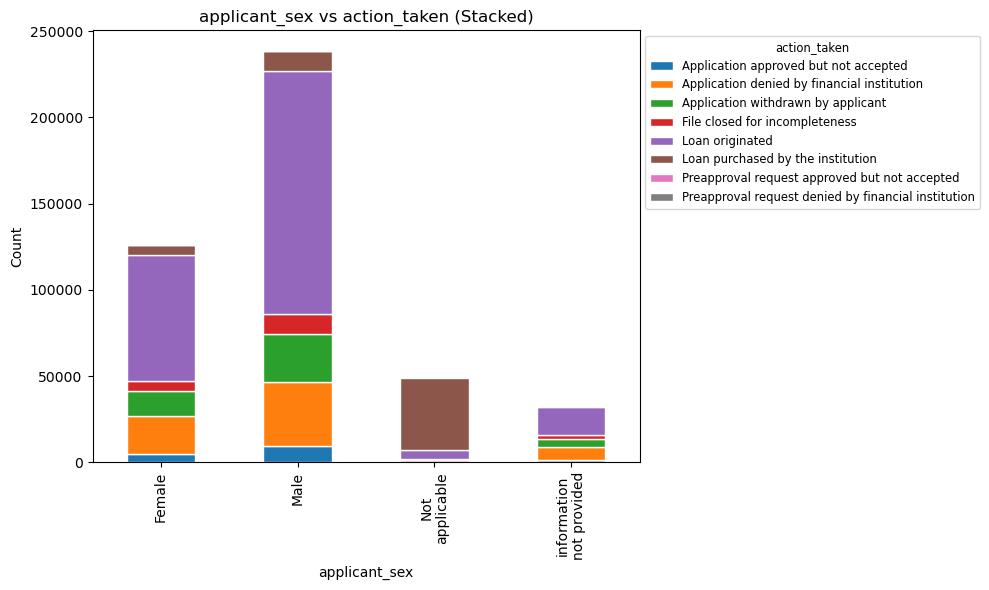

Statistics:

applicant_sex = Female (Total Count = 125952):
  action_taken = Application approved but not accepted: Count = 4757, Percentage = 3.78%
  action_taken = Application denied by financial institution: Count = 22294, Percentage = 17.70%
  action_taken = Application withdrawn by applicant: Count = 14285, Percentage = 11.34%
  action_taken = File closed for incompleteness: Count = 5551, Percentage = 4.41%
  action_taken = Loan originated: Count = 73209, Percentage = 58.12%
  action_taken = Loan purchased by the institution: Count = 5853, Percentage = 4.65%
  action_taken = Preapproval request approved but not accepted: Count = 1, Percentage = 0.00%
  action_taken = Preapproval request denied by financial institution: Count = 2, Percentage = 0.00%

applicant_sex = Male (Total Count = 238635):
  action_taken = Application approved but not accepted: Count = 9408, Percentage = 3.94%
  action_taken = Application denied by financial institution: Count = 37070, Percentage = 15.53%
  ac

In [190]:
plot_stacked_bar_chart('applicant_sex', 'action_taken', save=True)
print_group_stats('applicant_sex', 'action_taken')

Plot saved as bivariate_plots/stacked_applicant_race_vs_action_taken.png


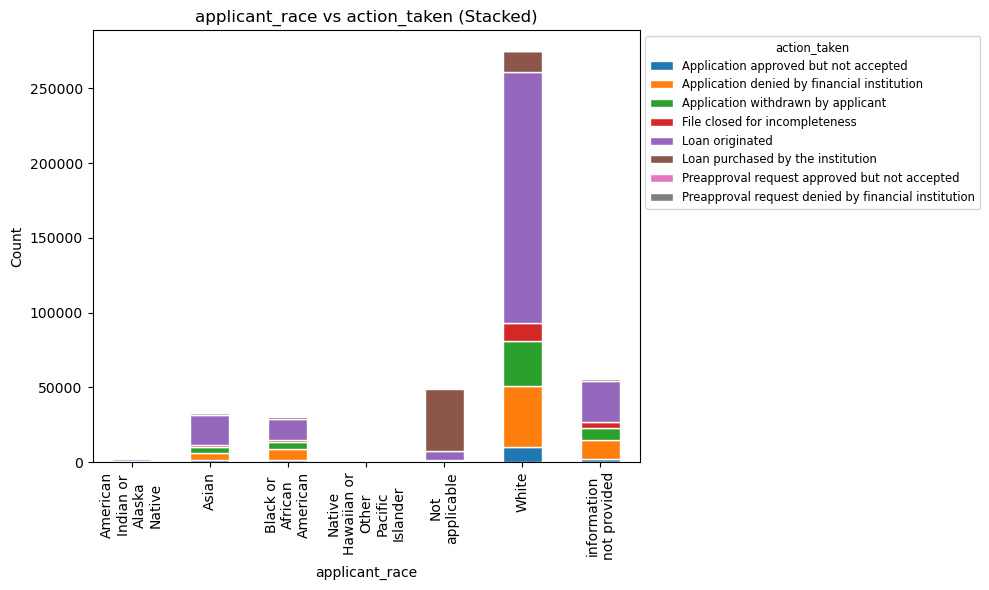

Statistics:

applicant_race = American Indian or Alaska Native (Total Count = 2030):
  action_taken = Application approved but not accepted: Count = 86, Percentage = 4.24%
  action_taken = Application denied by financial institution: Count = 647, Percentage = 31.87%
  action_taken = Application withdrawn by applicant: Count = 267, Percentage = 13.15%
  action_taken = File closed for incompleteness: Count = 140, Percentage = 6.90%
  action_taken = Loan originated: Count = 846, Percentage = 41.67%
  action_taken = Loan purchased by the institution: Count = 44, Percentage = 2.17%
  action_taken = Preapproval request approved but not accepted: Count = 0, Percentage = 0.00%
  action_taken = Preapproval request denied by financial institution: Count = 0, Percentage = 0.00%

applicant_race = Asian (Total Count = 33193):
  action_taken = Application approved but not accepted: Count = 1214, Percentage = 3.66%
  action_taken = Application denied by financial institution: Count = 5074, Percentage

In [191]:
plot_stacked_bar_chart('applicant_race', 'action_taken', save=True)
print_group_stats('applicant_race', 'action_taken')

Plot saved as bivariate_plots/grouped_applicant_ethnicity_vs_action_taken.png


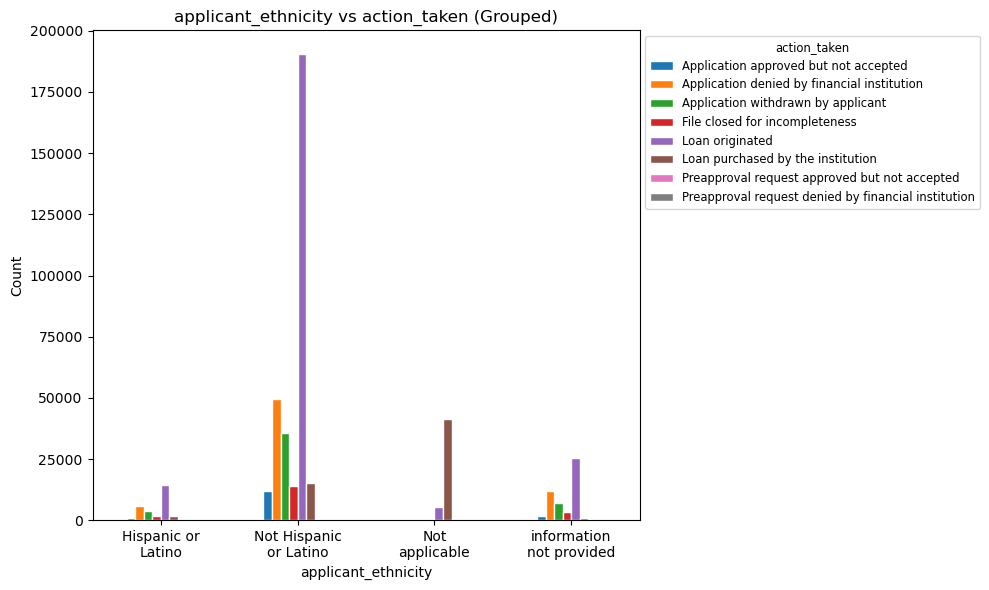

Statistics:

applicant_ethnicity = Hispanic or Latino (Total Count = 28879):
  action_taken = Application approved but not accepted: Count = 1164, Percentage = 4.03%
  action_taken = Application denied by financial institution: Count = 6019, Percentage = 20.84%
  action_taken = Application withdrawn by applicant: Count = 3857, Percentage = 13.36%
  action_taken = File closed for incompleteness: Count = 1683, Percentage = 5.83%
  action_taken = Loan originated: Count = 14521, Percentage = 50.28%
  action_taken = Loan purchased by the institution: Count = 1631, Percentage = 5.65%
  action_taken = Preapproval request approved but not accepted: Count = 0, Percentage = 0.00%
  action_taken = Preapproval request denied by financial institution: Count = 4, Percentage = 0.01%

applicant_ethnicity = Not Hispanic or Latino (Total Count = 317231):
  action_taken = Application approved but not accepted: Count = 12118, Percentage = 3.82%
  action_taken = Application denied by financial institution:

In [192]:
plot_grouped_bar_chart('applicant_ethnicity', 'action_taken', save=True)
print_group_stats('applicant_ethnicity', 'action_taken')

Plot saved as bivariate_plots/stacked_county_vs_action_taken.png


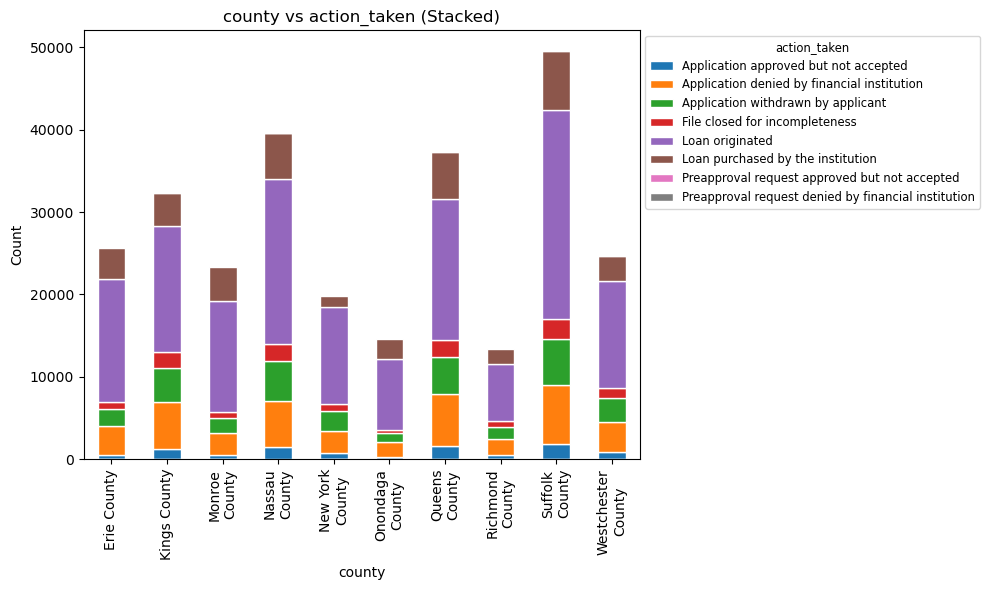

Statistics:

county = Erie County (Total Count = 25684):
  action_taken = Application approved but not accepted: Count = 543, Percentage = 2.11%
  action_taken = Application denied by financial institution: Count = 3511, Percentage = 13.67%
  action_taken = Application withdrawn by applicant: Count = 2009, Percentage = 7.82%
  action_taken = File closed for incompleteness: Count = 917, Percentage = 3.57%
  action_taken = Loan originated: Count = 14905, Percentage = 58.03%
  action_taken = Loan purchased by the institution: Count = 3799, Percentage = 14.79%
  action_taken = Preapproval request approved but not accepted: Count = 0, Percentage = 0.00%
  action_taken = Preapproval request denied by financial institution: Count = 0, Percentage = 0.00%

county = Kings County (Total Count = 32356):
  action_taken = Application approved but not accepted: Count = 1210, Percentage = 3.74%
  action_taken = Application denied by financial institution: Count = 5665, Percentage = 17.51%
  action_tak

In [197]:
# Determine the top six counties by count (popularity)
top_counties = df['county'].value_counts().nlargest(10).index.tolist()

# Filter the DataFrame for only these top counties
df_top = df[df['county'].isin(top_counties)]

# Option 1: Replace the global df with the filtered one (if your functions use the global df)
df = df_top

# Now call your functions
plot_stacked_bar_chart('county', 'action_taken', save=True)
print_group_stats('county', 'action_taken')


Plot saved as bivariate_plots/stacked_loan_type_vs_action_taken.png


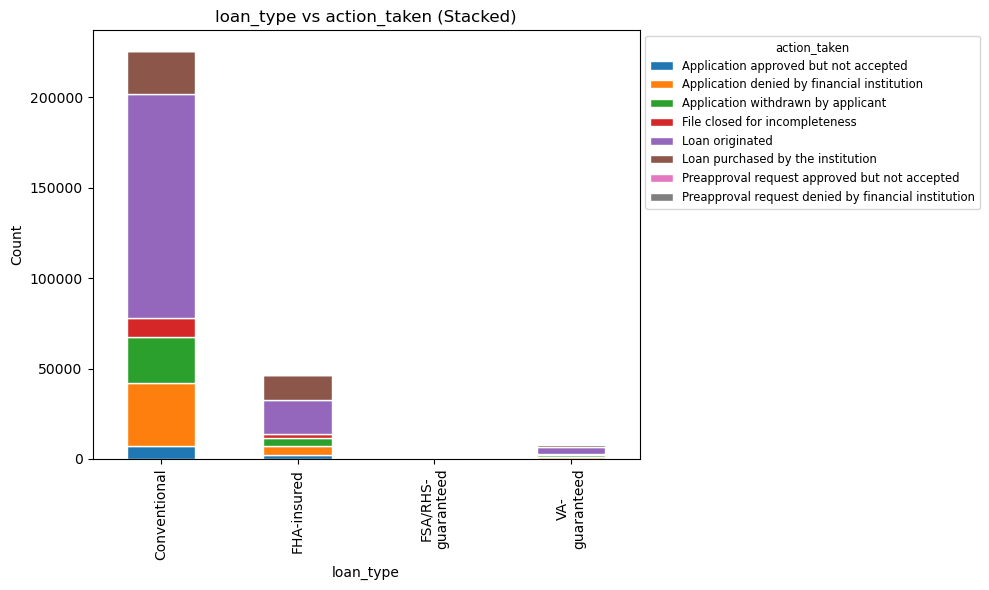

Statistics:

loan_type = Conventional (Total Count = 225732):
  action_taken = Application approved but not accepted: Count = 7420, Percentage = 3.29%
  action_taken = Application denied by financial institution: Count = 34334, Percentage = 15.21%
  action_taken = Application withdrawn by applicant: Count = 25836, Percentage = 11.45%
  action_taken = File closed for incompleteness: Count = 10443, Percentage = 4.63%
  action_taken = Loan originated: Count = 123679, Percentage = 54.79%
  action_taken = Loan purchased by the institution: Count = 24010, Percentage = 10.64%
  action_taken = Preapproval request approved but not accepted: Count = 2, Percentage = 0.00%
  action_taken = Preapproval request denied by financial institution: Count = 8, Percentage = 0.00%

loan_type = FHA-insured (Total Count = 46399):
  action_taken = Application approved but not accepted: Count = 1932, Percentage = 4.16%
  action_taken = Application denied by financial institution: Count = 5430, Percentage = 11.7

In [200]:
plot_stacked_bar_chart('loan_type', 'action_taken', save=True)
print_group_stats('loan_type', 'action_taken')

Plot saved as bivariate_plots/grouped_purpose_vs_action_taken.png


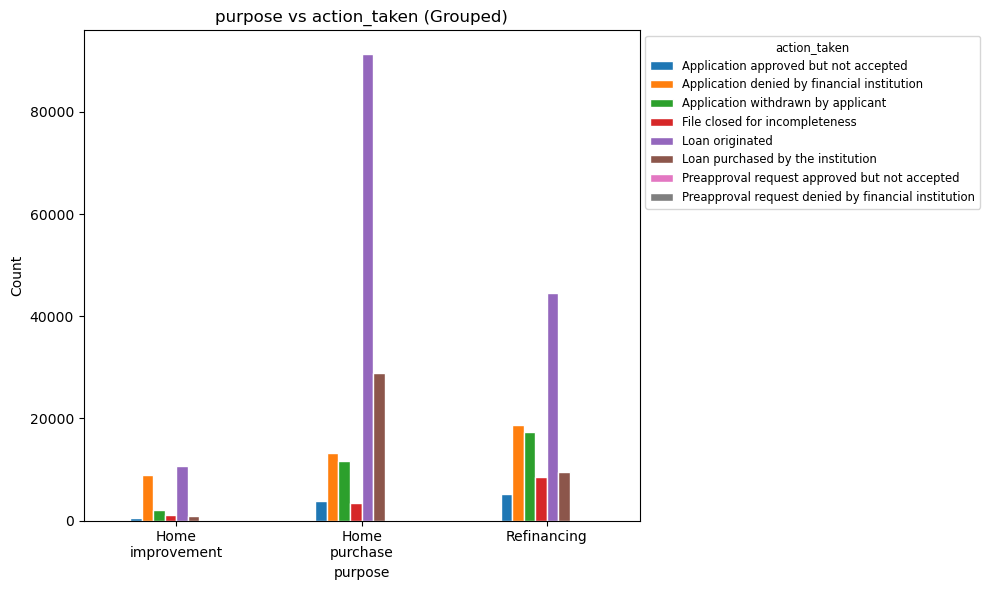

Statistics:

purpose = Home improvement (Total Count = 24089):
  action_taken = Application approved but not accepted: Count = 576, Percentage = 2.39%
  action_taken = Application denied by financial institution: Count = 8883, Percentage = 36.88%
  action_taken = Application withdrawn by applicant: Count = 2084, Percentage = 8.65%
  action_taken = File closed for incompleteness: Count = 1025, Percentage = 4.26%
  action_taken = Loan originated: Count = 10695, Percentage = 44.40%
  action_taken = Loan purchased by the institution: Count = 826, Percentage = 3.43%
  action_taken = Preapproval request approved but not accepted: Count = 0, Percentage = 0.00%
  action_taken = Preapproval request denied by financial institution: Count = 0, Percentage = 0.00%

purpose = Home purchase (Total Count = 152501):
  action_taken = Application approved but not accepted: Count = 3799, Percentage = 2.49%
  action_taken = Application denied by financial institution: Count = 13229, Percentage = 8.67%
  ac

In [204]:
plot_grouped_bar_chart('purpose', 'action_taken', save=True)
print_group_stats('purpose', 'action_taken')

Plot saved as bivariate_plots/scatter_income_vs_action.png


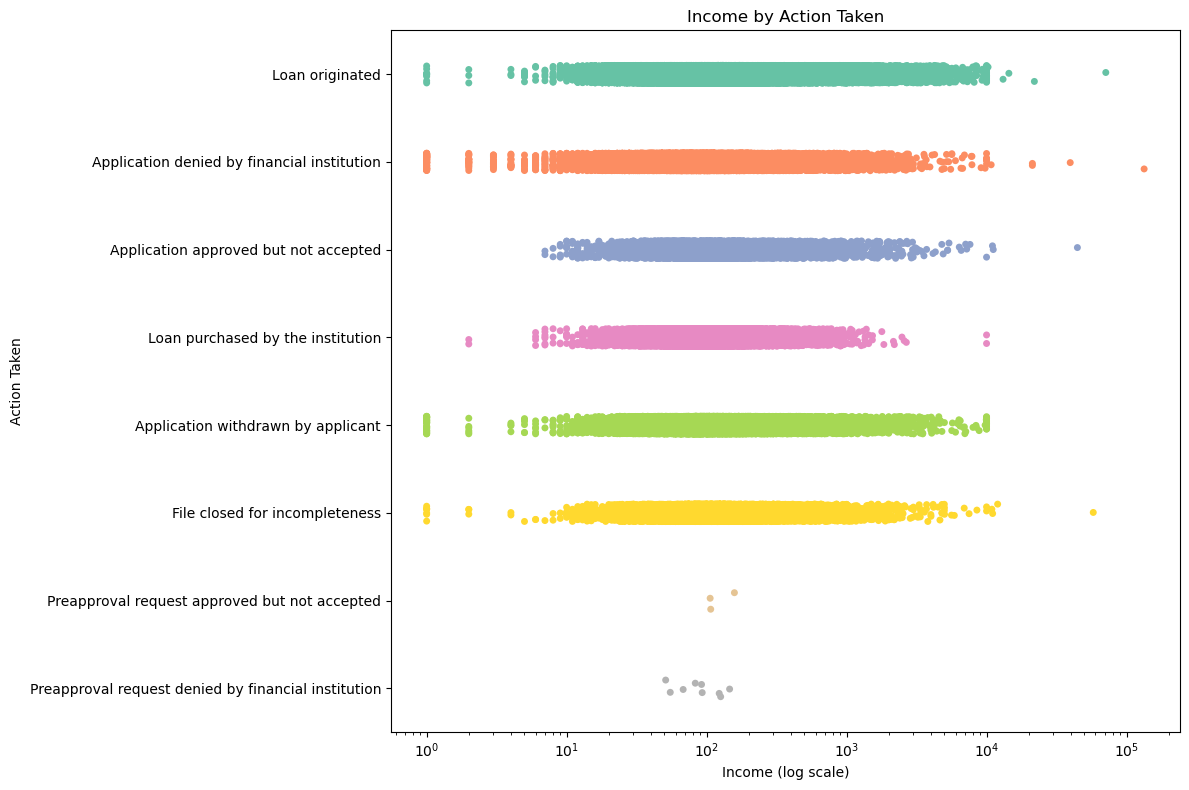

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.stripplot(x='applicant_income_k', y='action_taken', data=df, jitter=True, palette='Set2')
plt.xscale('log')  # log scale to better handle income outliers
plt.xlabel('Income (log scale)')
plt.ylabel('Action Taken')
plt.title('Income by Action Taken')
plt.tight_layout()


file_name = f"bivariate_plots/scatter_income_vs_action.png"
plt.savefig(file_name)
print(f"Plot saved as {file_name}")
plt.show()


Plot saved as bivariate_plots/scatter_loan_amount_vs_action.png


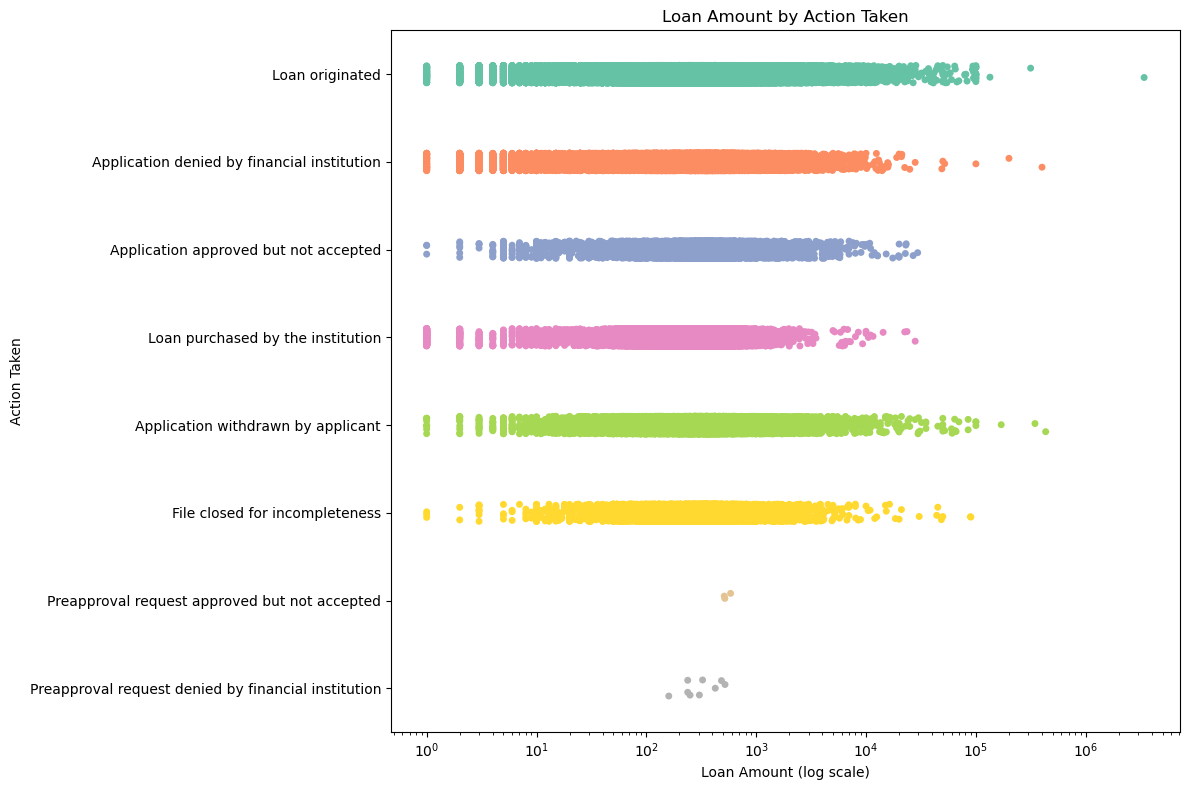

In [214]:

plt.figure(figsize=(12,8))
sns.stripplot(x='loan_amount_k', y='action_taken', data=df, jitter=True, palette='Set2')
plt.xscale('log')  # Use log scale to manage extreme values
plt.xlabel('Loan Amount (log scale)')
plt.ylabel('Action Taken')
plt.title('Loan Amount by Action Taken')
plt.tight_layout()


file_name = f"bivariate_plots/scatter_loan_amount_vs_action.png"
plt.savefig(file_name)
print(f"Plot saved as {file_name}")
plt.show()


In [51]:
df.to_csv('loan_data.csv', index=False)

print("DataFrame saved successfully as 'loan_data.csv'.")

DataFrame saved successfully as 'loan_data.csv'.


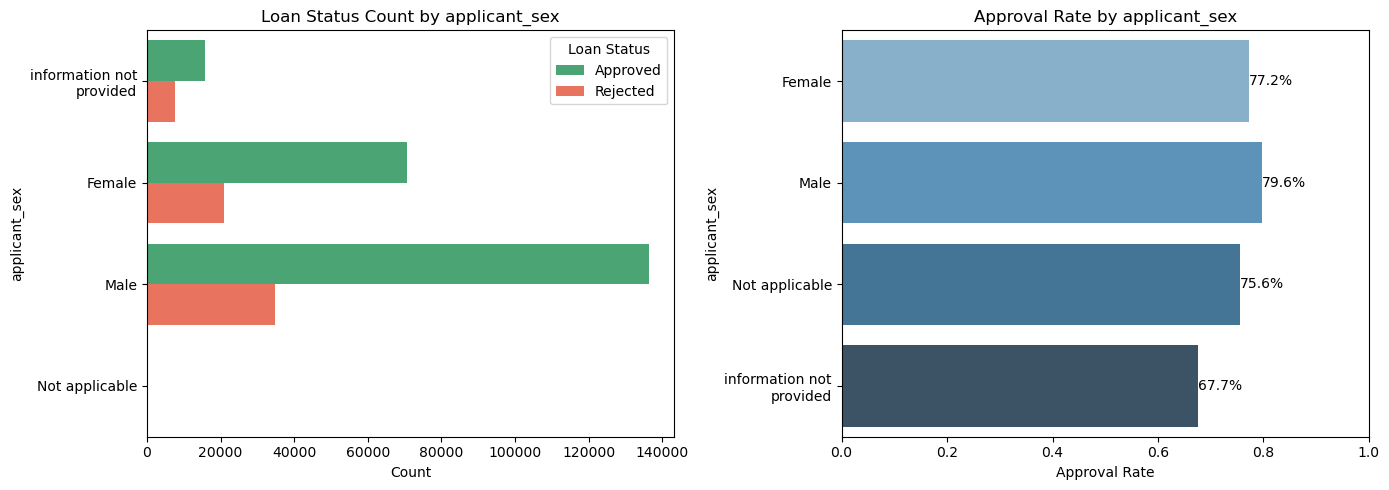

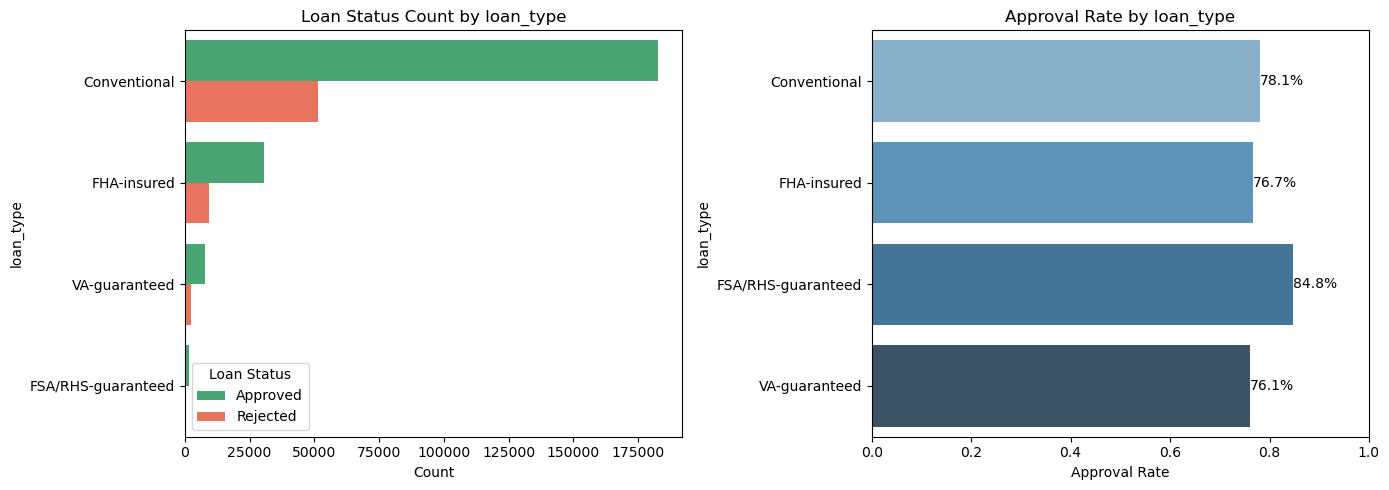

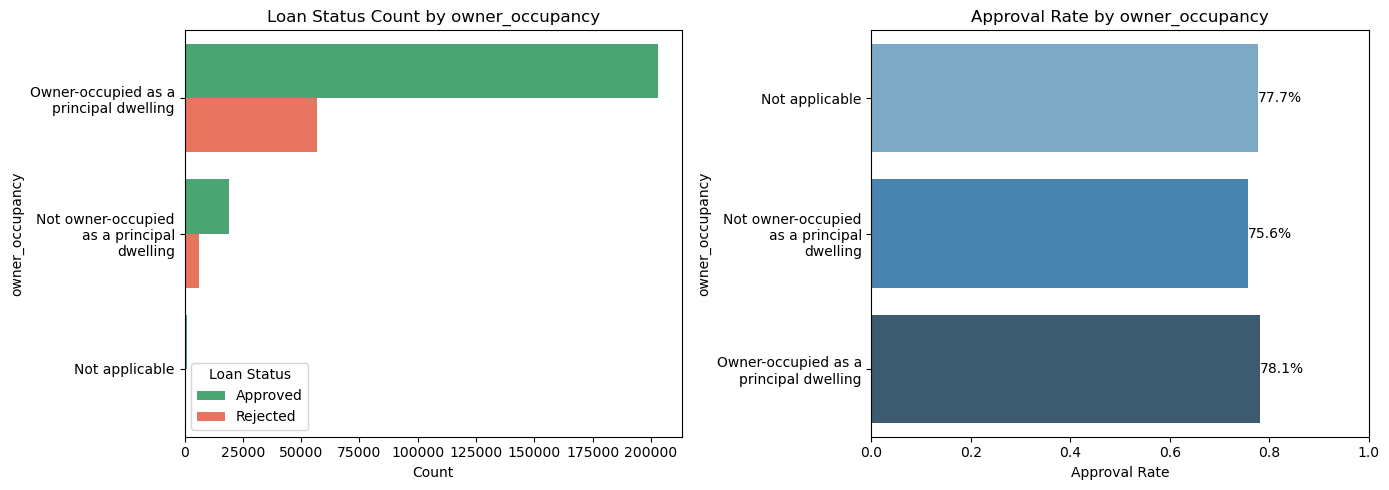

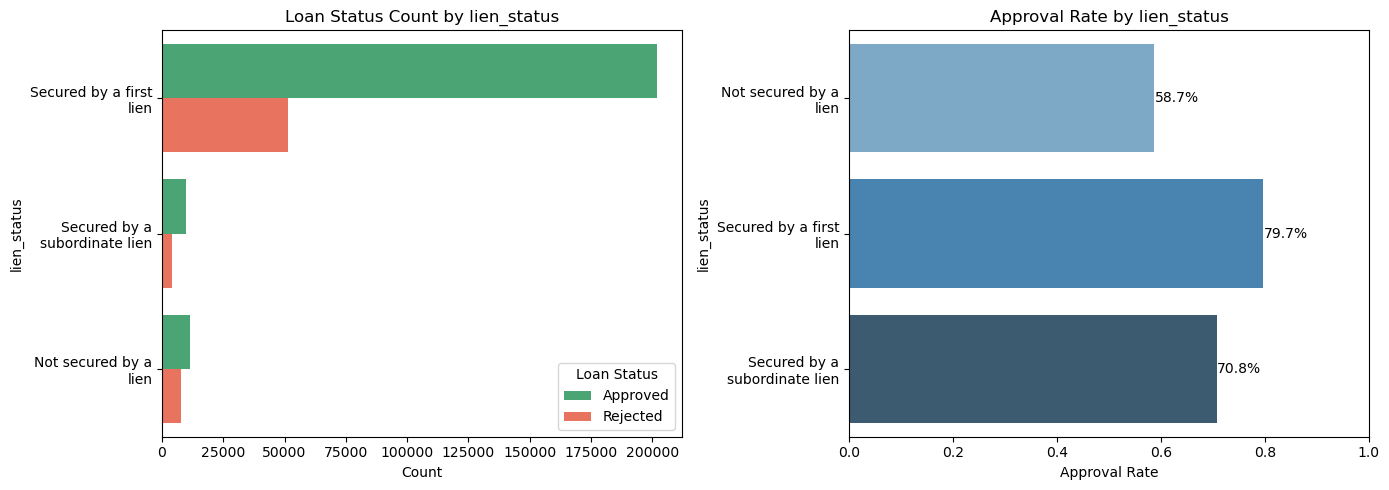

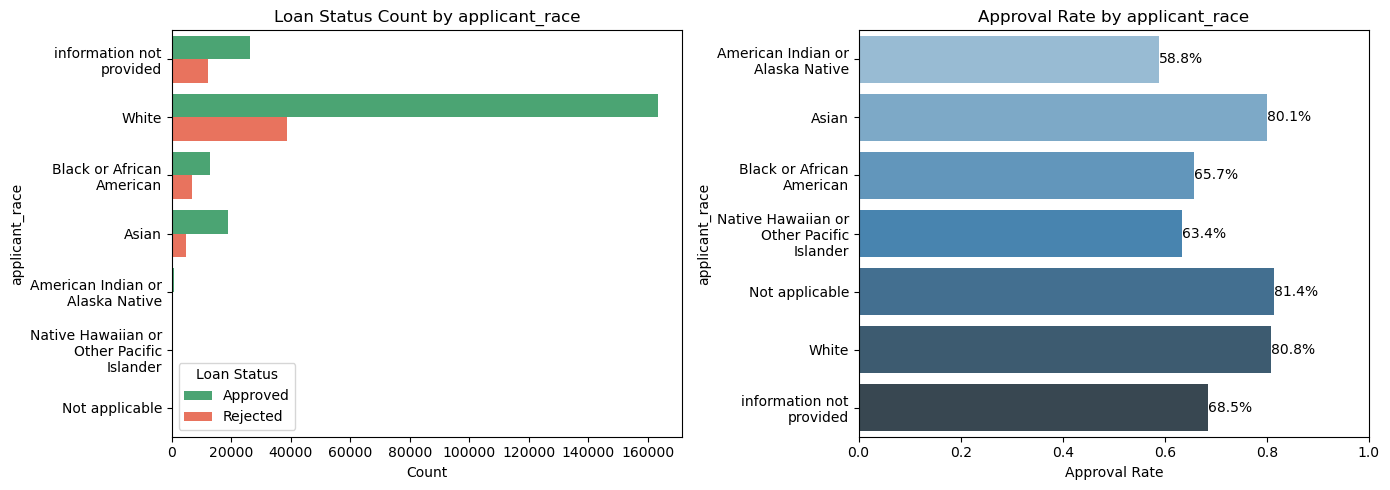

           Feature  Chi-Square  P-Value Significant
4   applicant_race     5095.21      0.0         Yes
3      lien_status     4964.83      0.0         Yes
0    applicant_sex     1748.66      0.0         Yes
1        loan_type      105.89      0.0         Yes
2  owner_occupancy       78.88      0.0         Yes


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import textwrap

def create_binary_loan_status(df, status_column, approved_values, rejected_values):
    """
    Create a binary loan_status column based on the values in the status column.
    
    Parameters:
        df (pandas.DataFrame): DataFrame containing loan application data
        status_column (str): Name of the column containing loan status text
        approved_values (list): List of values that indicate approval
        rejected_values (list): List of values that indicate rejection
        
    Returns:
        pandas.DataFrame: DataFrame with new 'loan_status' binary column
    """
    # Create a copy to avoid modifying the original
    df_copy = df.copy()
    
    # Create the binary loan_status column
    conditions = [
        df_copy[status_column].isin(approved_values),
        df_copy[status_column].isin(rejected_values)
    ]
    choices = ['Approved', 'Rejected']
    
    df_copy['loan_status'] = np.select(conditions, choices, default='Other')
    
    # Filter to only include Approved and Rejected
    df_filtered = df_copy[df_copy['loan_status'].isin(['Approved', 'Rejected'])]
    
    return df_filtered

def analyze_categorical_vs_loan_status(df, categorical_features=None):
    """
    Analyze the relationships between categorical features and binary loan status (Approved vs Rejected).
    Performs chi-square tests to measure association strength and creates visualizations showing counts and approval rates.
    
    Parameters:
        df (pandas.DataFrame): DataFrame containing loan application data with the 'loan_status' column.
        categorical_features (list, optional): List of categorical features to analyze. If None, uses default list.
        
    Returns:
        pandas.DataFrame: Summary DataFrame with chi-square test results.
    """
    # Default list of categorical features if none provided
    if categorical_features is None:
        categorical_features = [
            'applicant_sex',
            'loan_type',
            'owner_occupancy',
            'lien_status',
            'applicant_race'
        ]
    
    # Ensure all specified features exist in the DataFrame
    existing_features = [feature for feature in categorical_features if feature in df.columns]
    if not existing_features:
        raise ValueError("None of the specified categorical features exist in the DataFrame")
    
    summary_data = []
    
    for feature in existing_features:
        # Create contingency table (cross-tabulation) using the binary loan status
        contingency_table = pd.crosstab(df[feature], df['loan_status'])
        
        # Skip features with only one category (can't perform chi-square)
        if contingency_table.shape[0] <= 1:
            continue
            
        # Perform chi-square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Check if any expected value is less than 5 (chi-square assumption)
        if (expected < 5).any():
            print(f"Warning: {feature} has expected values < 5, chi-square results may be unreliable")
        
        summary_data.append({
            'Feature': feature,
            'Chi-Square': round(chi2, 2),
            'P-Value': round(p_value, 4),
            'Significant': 'Yes' if p_value < 0.05 else 'No'
        })
        
        # Create figure with count and approval rate plots
        plt.figure(figsize=(14, 5))
        
        # Plot 1: Count of rejected and approved loans (horizontal bar chart)
        plt.subplot(1, 2, 1)
        ax1 = sns.countplot(y=feature, hue='loan_status', data=df, 
                           palette={'Rejected': 'tomato', 'Approved': 'mediumseagreen'})
        plt.title(f'Loan Status Count by {feature}')
        plt.xlabel('Count')
        plt.ylabel(feature)
        plt.legend(title='Loan Status')
        
        # Wrap y-axis labels
        ax1.set_yticklabels([textwrap.fill(label.get_text(), 20) for label in ax1.get_yticklabels()])
        
        # Plot 2: Approval rate per category (horizontal bar chart)
        plt.subplot(1, 2, 2)
        # Calculate approval rate: percentage of 'Approved' in each category of the feature
        approval_rate = df.groupby(feature)['loan_status'].apply(
            lambda x: (x=='Approved').mean()).reset_index(name='Approval Rate')
        
        ax2 = sns.barplot(y=feature, x='Approval Rate', data=approval_rate, palette='Blues_d')
        plt.title(f'Approval Rate by {feature}')
        plt.xlabel('Approval Rate')
        plt.ylabel(feature)
        plt.xlim(0, 1)
        
        # Wrap y-axis labels for the horizontal bar chart
        ax2.set_yticklabels([textwrap.fill(label.get_text(), 20) for label in ax2.get_yticklabels()])
        
        # Add percentage labels to each horizontal bar
        for p in ax2.patches:
            width = p.get_width()
            percentage = f"{100 * width:.1f}%"
            # Annotate at the end of each bar
            ax2.annotate(percentage, 
                         (width, p.get_y() + p.get_height() / 2),
                         ha='left', va='center', fontsize=10, color='black')
        
        plt.tight_layout()
        plt.show()
        plt.close()
    
    # Create summary DataFrame and sort by chi-square value (largest associations first)
    summary_df = pd.DataFrame(summary_data)
    if not summary_df.empty:
        summary_df = summary_df.sort_values('Chi-Square', ascending=False)
    
    return summary_df

# Example usage:

# Define the approved and rejected values
approved_values = ['Loan originated']
rejected_values = ['Application denied by financial institution']

# Preprocess to create the binary loan_status column (assuming 'action_taken' is your status column)
processed_df = create_binary_loan_status(df, 'action_taken', approved_values, rejected_values)

# Run the analysis
summary_df = analyze_categorical_vs_loan_status(processed_df)
print(summary_df)


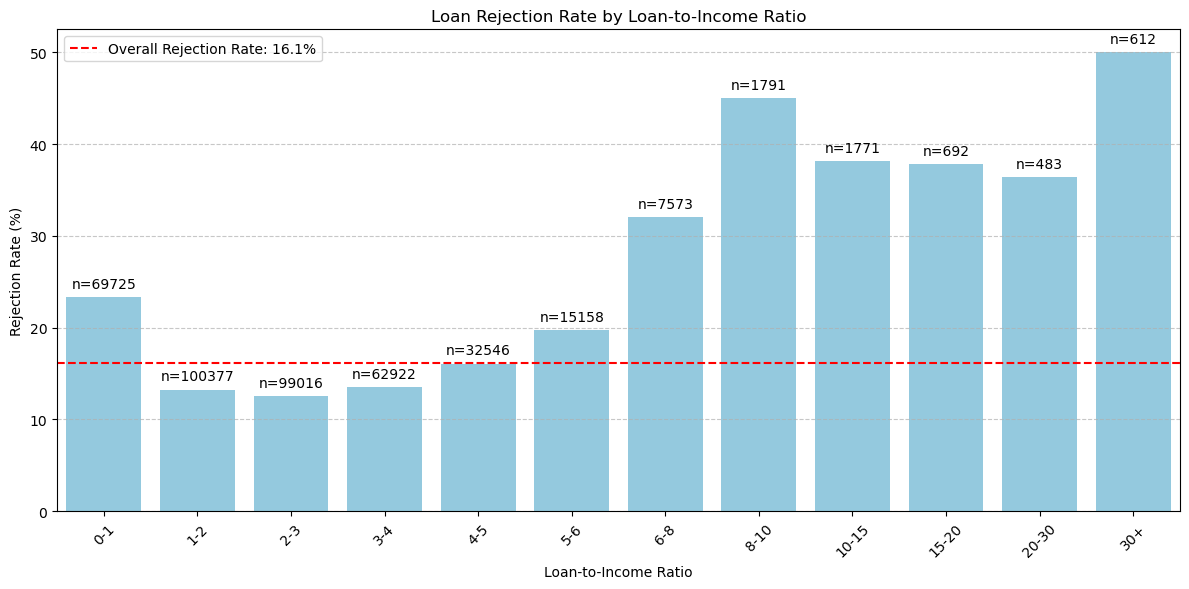

   loan_income_ratio_bin  rejection_rate   count
0                    0-1       23.344568   69725
1                    1-2       13.249051  100377
2                    2-3       12.513129   99016
3                    3-4       13.484950   62922
4                    4-5       16.078781   32546
5                    5-6       19.725557   15158
6                    6-8       32.034861    7573
7                   8-10       45.002792    1791
8                  10-15       38.170525    1771
9                  15-20       37.861272     692
10                 20-30       36.438923     483
11                   30+       50.000000     612


In [52]:

# 1. Calculate loan-to-income ratio
df['loan_to_income_ratio'] = df['loan_amount_k'] / df['applicant_income_k']

# 2. Mark rejected loans (adjust the rejection value as needed)
reject_val = 'Application denied by financial institution'
df['is_rejected'] = df['action_taken'] == reject_val

# 3. Filter out infinite, missing, or non-positive ratios
df = df[np.isfinite(df['loan_to_income_ratio']) & (df['loan_to_income_ratio'] > 0)]

# 4. Bin the loan-to-income ratio
bins = [0, 1, 2, 3, 4, 5, 6, 8, 10, 15, 20, 30, np.inf]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-8', '8-10', '10-15', '15-20', '20-30', '30+']
df['loan_income_ratio_bin'] = pd.cut(df['loan_to_income_ratio'], bins=bins, labels=labels)

# 5. Aggregate rejection rate and count per bin
agg = df.groupby('loan_income_ratio_bin')['is_rejected'].agg(['mean', 'count']).reset_index()
agg['rejection_rate'] = agg['mean'] * 100

# 6. Create the visualization
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='loan_income_ratio_bin', y='rejection_rate', data=agg, color='skyblue')

# Add count labels above each bar
for i, row in agg.iterrows():
    ax.text(i, row['rejection_rate'] + 1, f"n={row['count']}", ha='center')

plt.title('Loan Rejection Rate by Loan-to-Income Ratio')
plt.xlabel('Loan-to-Income Ratio')
plt.ylabel('Rejection Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add overall rejection rate line
overall_rej = df['is_rejected'].mean() * 100
plt.axhline(y=overall_rej, color='red', linestyle='--', label=f'Overall Rejection Rate: {overall_rej:.1f}%')
plt.legend()

plt.tight_layout()
plt.show()

# 7. Print the aggregated data table
print(agg[['loan_income_ratio_bin', 'rejection_rate', 'count']])


In [19]:
import sys
print(sys.version)


3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
